#**Final Project by Beta Team**
<hr>   

**Leon Hafid El Rasyid**
<br>
**Herfan Heryandi**
<br>
**Rico Martin Sitorus**

# **Hotel Booking Demand - Modelling**
<hr>



<img src="https://assets.hiltonstatic.com/hilton-asset-cache/image/upload/c_fill,w_1920,h_1080,q_70,f_auto,g_auto/Imagery/Property%20Photography/Conrad/F/FAOAPCI/Pools%20Airview%20%202-6.jpg">



Setelah menyelesaikan tahapan analisis, langkah selanjutnya adalah **pemodelan menggunakan algoritma *Machine Learning* (ML)**.  *Machine Learning* sendiri merupakan sebuah cabang dari kecerdasan buatan (*Artificial Intelligence/AI*) yang berfokus pada pengembangan algoritma serta model yang memungkinkan sistem komputer untuk **belajar dari data** dan kemudian **membuat prediksi atau keputusan** tanpa perlu diprogram secara eksplisit untuk tugas tersebut. Untuk pemahaman yang lebih mendalam mengenai *Machine Learning*, Anda dapat merujuk ke sumber berikut: [Machine Learning](https://rsisinternational.org/journals/ijrias/DigitalLibrary/volume-7-issue-7/77-81.pdf). Di bawah ini adalah daftar *libraries* (*pustaka pemrograman*) yang akan dipergunakan dalam tahapan pemodelan ini.


## Data Preparation

In [2]:
## Import Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.stats.outliers_influence import variance_inflation_factor 

# Data Splitting
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold

# Preprocessing
from sklearn.compose import ColumnTransformer
from imblearn.pipeline import Pipeline
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import OneHotEncoder
from category_encoders import BinaryEncoder, OrdinalEncoder
from sklearn.preprocessing import RobustScaler, MinMaxScaler, StandardScaler
from sklearn.base import BaseEstimator, TransformerMixin

# Resampler
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler

# ML Algorithm
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier

# Hyperparameter Tuning
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# Metrics
from sklearn.metrics import recall_score, classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, precision_score,f1_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import roc_auc_score

from sklearn.ensemble import VotingClassifier, StackingClassifier, RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost.sklearn import XGBClassifier

from sklearn.metrics import fbeta_score, make_scorer

# Import Data
df=pd.read_csv('hotel_bookings.csv')
# Ignore Warning
import sys
import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")

# Set max columns
pd.set_option('display.max_columns', None)

In [3]:
# Load the CSV file into a DataFrame
df = pd.read_csv('/Users/leonhafidelrasyid/Library/CloudStorage/OneDrive-Personal/Purwadhika/Final Project/My Final Project/hotel_bookings.csv')

# Display the first few rows of the DataFrame
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [4]:

pd.DataFrame({
    'kolom': df.columns.values,
    'data_type': df.dtypes.values,
    'null_value(%)': df.isna().mean().values * 100,
    'negative_value(%)': [len(df[col][df[col] < 0]) / len(df) * 100 if col in df.select_dtypes(include=[np.number]).columns else 0 for col in df.columns],
    '0_value(%)': [len(df[col][df[col] == 0]) / len(df) * 100 if col in df.select_dtypes(include=[np.number]).columns else 0 for col in df.columns],
    'duplicate' : df.duplicated().sum(),
    'n_unique': df.nunique().values,
    'sample_unique': [df[col].unique() for col in df.columns]}
).round(3)

,kolom,data_type,null_value(%),negative_value(%),0_value(%),duplicate,n_unique,sample_unique
0,hotel,object,0.000,0.000,0.000,31994,2,"[Resort Hotel, City Hotel]"
1,is_canceled,int64,0.000,0.000,62.958,31994,2,"[0, 1]"
2,lead_time,int64,0.000,0.000,5.315,31994,479,"[342, 737, 7, 13, 14, 0, 9, 85, 75, 23, 35, 68..."
3,arrival_date_year,int64,0.000,0.000,0.000,31994,3,"[2015, 2016, 2017]"
4,arrival_date_month,object,0.000,0.000,0.000,31994,12,"[July, August, September, October, November, D..."
5,arrival_date_week_number,int64,0.000,0.000,0.000,31994,53,"[27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 3..."
6,arrival_date_day_of_month,int64,0.000,0.000,0.000,31994,31,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14..."
7,stays_in_weekend_nights,int64,0.000,0.000,43.553,31994,17,"[0, 1, 2, 4, 3, 6, 13, 8, 5, 7, 12, 9, 16, 18,..."
8,stays_in_week_nights,int64,0.000,0.000,6.403,31994,35,"[0, 1, 2, 3, 4, 5, 10, 11, 8, 6, 7, 15, 9, 12,..."
9,adults,int64,0.000,0.000,0.338,31994,14,"[2, 1, 3, 4, 40, 26, 50, 27, 55, 0, 20, 6, 5, 10]"


---
# Pendahuluan

## Goals

Pemodelan dalam bagian ini memiliki tujuan utama untuk **membangun suatu model data perhotelan yang mampu memprediksi pembatalan reservasi hotel**. Model prediksi ini akan difungsikan sebagai **landasan strategis dalam upaya optimalisasi pendapatan hotel**.  Diharapkan, pemodelan ini dapat menghasilkan **pemahaman mendalam (*insight*) mengenai pola perilaku, karakteristik khusus, serta preferensi tamu**. Dengan memahami secara komprehensif faktor-faktor yang memengaruhi keputusan pembatalan reservasi, pihak hotel dapat **merancang strategi yang lebih terfokus dan efektif**. Strategi-strategi tersebut dapat berupa **penawaran promosi yang ditargetkan pada periode waktu tertentu** ataupun implementasi **kebijakan *overbooking* yang lebih terukur**. Implementasi strategi yang berbasis data ini diharapkan mampu **meningkatkan tingkat hunian kamar** dan **meminimalisir potensi kerugian pendapatan** yang diakibatkan oleh pembatalan reservasi.


## Modelling with Machine Learning

Pemodelan dengan *machine learning* diterapkan sebagai sebuah pendekatan untuk **menganalisis dan memprediksi kecenderungan perilaku pelanggan terkait pembatalan reservasi hotel**.  `Tujuan utama dari pemodelan ini adalah untuk mengidentifikasi pemesanan yang memiliki probabilitas tinggi untuk dibatalkan`. Dengan prediksi ini, pihak hotel dapat **merumuskan strategi yang tepat guna mengoptimalkan pendapatan**.  Informasi yang dihasilkan dari pemodelan ini memungkinkan hotel untuk **menekan angka pembatalan dan secara keseluruhan meningkatkan pendapatan**.  Dalam konteks pemodelan ini, **pembatalan reservasi akan dikategorikan sebagai kelas positif**, sementara **reservasi yang tidak dibatalkan akan disebut sebagai kelas negatif**.

Dataset yang digunakan memiliki kolom **`is_canceled`**, yang merupakan label berisi informasi yang menunjukkan apakah seorang tamu melakukan pembatalan pemesanan atau tidak.  Berdasarkan adanya informasi label ini, model *machine learning* yang akan dibangun termasuk dalam kategori **model *supervised learning* klasifikasi**.  Berikut adalah beberapa model klasifikasi yang relevan untuk diterapkan pada kasus ini:

1.  **Regresi Logistik (*Logistic Regression*)**

    *   *Logistic Regression* adalah model yang **sederhana namun efektif** dalam memprediksi probabilitas suatu kejadian. Dalam konteks ini, kejadian yang diprediksi adalah **pembatalan pemesanan berdasarkan fitur-fitur yang dimiliki calon tamu hotel**. Keunggulan model ini terletak pada **hasil prediksinya yang relatif mudah diinterpretasi**, sehingga sangat berguna sebagai titik awal analisis.

2.  **_K-Nearest Neighbors Classifier_ (*KNeighborsClassifier*)**

    *   *_K-Nearest Neighbors Classifier_* bekerja dengan **membandingkan setiap pemesanan dengan tetangga terdekatnya dalam *feature space***. Prediksi kemudian dibuat **berdasarkan kelas *outcome* yang paling dominan di antara tetangga terdekat tersebut**. Model ini memiliki kemampuan untuk **mengenali pola-pola kompleks**, yang sangat relevan dalam skenario di mana keputusan pembatalan tamu dipengaruhi oleh beragam faktor.

3.  **(*Decision Tree*)**

    *   *Decision Tree* bekerja dengan **membagi data menjadi serangkaian cabang**, di mana setiap cabang merepresentasikan **aturan keputusan berdasarkan nilai fitur**. Pada akhirnya, model ini akan menghasilkan **berbagai *outcome* yang menunjukkan apakah suatu pemesanan akan dibatalkan atau tidak**. Kelebihan *Decision Tree* adalah kemampuannya untuk **menampilkan secara eksplisit faktor-faktor yang memiliki pengaruh signifikan** dalam memprediksi potensi pembatalan oleh calon tamu.

4.  **Voting (*Voting Classifier*) - *Hard Voting***

    *   *Voting Classifier* dengan metode *Hard Voting* adalah pendekatan *ensemble* yang **menggabungkan prediksi dari beberapa model *machine learning***. Prediksi akhir ditentukan **berdasarkan keputusan mayoritas dari model-model yang digabungkan**. Metode ini bertujuan untuk **meningkatkan akurasi prediksi** dengan **memanfaatkan kekuatan masing-masing model**, sehingga menghasilkan prediksi yang lebih andal.

5.  **Voting (*Voting Classifier*) - *Soft Voting***

    *   *Voting Classifier* dengan metode *Soft Voting* juga merupakan pendekatan *ensemble*, namun berbeda dalam cara menggabungkan prediksi. Metode ini **menghitung rata-rata probabilitas kelas yang diprediksi oleh setiap model anggota**. Selanjutnya, **kelas dengan probabilitas rata-rata tertinggi dipilih sebagai prediksi akhir**. *Soft Voting* memungkinkan pengklasifikasi untuk **mempertimbangkan tidak hanya kelas yang paling mungkin dari setiap model, tetapi juga tingkat kepercayaan dari prediksi tersebut**, sehingga seringkali menghasilkan prediksi yang lebih akurat dan *nuanced*.

6.  **P*Stacking* (*Stacking Classifier*)**

    *   *Stacking Classifier* adalah metode *ensemble* tingkat lanjut yang **menggabungkan beberapa model *machine learning* (model dasar) dengan melatih sebuah *meta-model***. *Meta-model* ini bertugas untuk **mempelajari cara terbaik untuk mengkombinasikan prediksi dari model-model dasar** guna menghasilkan prediksi akhir yang optimal. Model dasar akan **menghasilkan prediksi mereka masing-masing**, dan prediksi-prediksi ini kemudian **dijadikan *input* bagi *meta-model*** untuk mempelajari pola kombinasi yang paling efektif.

7.  ***Random Forest* (*Random Forest Classifier*)**

    *   *Random Forest Classifier* adalah metode *ensemble* yang memanfaatkan prinsip *bagging* dan *feature randomness*. Model ini bekerja dengan **membangun banyak *Decision Tree*** (membentuk "hutan") dan kemudian **menggabungkan prediksi dari setiap pohon** untuk meningkatkan akurasi dan **mengurangi risiko *overfitting***. Setiap pohon dalam *Random Forest* **dilatih menggunakan *subset* data dan *subset* fitur yang dipilih secara acak**. Prediksi akhir dari *Random Forest* ditentukan melalui **mekanisme *voting* mayoritas** dari semua pohon yang ada.

8.  ***AdaBoost* (*AdaBoost Classifier*)**

    *   *AdaBoost Classifier* adalah teknik *ensemble* yang berfokus pada **peningkatan kinerja model-model lemah** (yang seringkali berupa *Decision Tree* dengan kedalaman terbatas).  Pendekatan *AdaBoost* bekerja dengan **memberikan bobot lebih besar pada *instance* data yang salah diklasifikasikan oleh model sebelumnya**. Metode ini membangun model secara **iteratif (berurutan)**, di mana setiap model selanjutnya **berusaha untuk memperbaiki kesalahan yang dilakukan oleh model pendahulunya**, sehingga menghasilkan model *ensemble* yang kuat.

9.  ***Gradient Boosting* (*GradientBoosting Classifier*)**

    *   *Gradient Boosting Classifier* adalah metode *ensemble* lain yang juga bekerja secara **berurutan dalam membangun model**.  Mirip dengan *AdaBoost*, setiap model baru dalam *Gradient Boosting* bertujuan untuk **memperbaiki kesalahan yang dibuat oleh model sebelumnya**. Namun, *Gradient Boosting* melakukannya dengan cara **meminimalkan *loss function*** (fungsi kerugian) melalui pendekatan *gradient descent*. Proses iteratif ini secara bertahap **meningkatkan akurasi prediksi dari model *ensemble***.

10. **XGBoost (*XGBClassifier*)**
    *   *XGBClassifier* adalah sebuah implementasi dari algoritma *Gradient Boosting* yang **dioptimalkan untuk kecepatan dan kinerja**.  Selain efisiensi, *XGBoost* juga **mengincorporasi teknik regularisasi tingkat lanjut** untuk **mencegah *overfitting***, menjadikannya tangguh bahkan dalam menghadapi *dataset* yang kompleks. **Efisiensi dan skalabilitas *XGBoost*** menjadikannya pilihan yang populer untuk menangani *dataset* berukuran besar dengan banyak fitur dan relasi yang kompleks, seperti dalam kasus **prediksi pembatalan hotel**.


---
## Strategy and Metrics

**Strategi : Overbooking**


[*Overbooking*](https://www.siteminder.com/r/hotel-overbookings-pros-and-cons-strategy/), atau **pemesanan berlebih**, adalah `praktik yang umum diterapkan, terutama dalam industri perhotelan. Dalam praktik ini, penyedia layanan melakukan pemesanan kamar atau tempat melebihi kapasitas aktual yang tersedia`. Tujuan utama dari *overbooking* adalah **mengantisipasi kemungkinan sejumlah pelanggan tidak hadir (*no-show*) atau membatalkan reservasi**.

**Alasan Penerapan *Overbooking***:

*   ***No-Show* (Tidak Hadir)**:  Sejumlah pelanggan seringkali tidak muncul pada waktu reservasi yang telah dibuat, yang berpotensi mengakibatkan **kerugian pendapatan bagi penyedia layanan** akibat kamar atau tempat yang kosong.
*   **Pembatalan Reservasi**:  Pembatalan reservasi, terutama yang dilakukan **mendekati waktu kedatangan**, juga dapat menyebabkan **terjadinya kekosongan kamar atau tempat yang tidak terisi**, yang merugikan dari segi pendapatan.
*   **Optimalisasi Pendapatan**: Dengan menerapkan *overbooking*, perusahaan berharap dapat **memaksimalkan potensi pendapatan** dengan cara **mengisi kamar atau tempat yang mungkin kosong** akibat *no-show* atau pembatalan.

**Risiko yang Terkait dengan *Overbooking***:

*   **Kepuasan Pelanggan Berpotensi Menurun**:  Apabila jumlah pelanggan yang hadir melebihi kapasitas yang tersedia karena *overbooking*, **sebagian pelanggan mungkin tidak mendapatkan kamar atau tempat yang telah mereka pesan**. Situasi ini dapat **memicu ketidakpuasan pelanggan** dan **merusak reputasi penyedia layanan**.
*   **Perlunya Manajemen Krisis**:  Penyedia layanan yang menerapkan *overbooking* harus memiliki **rencana kontingensi yang solid untuk mengatasi situasi *overbooking***. Rencana ini dapat mencakup **penawaran kompensasi kepada pelanggan yang terdampak**, **pengalihan pelanggan ke lokasi alternatif**, atau pemberian ***upgrade* kamar atau layanan**.

**Praktik yang Umum Dilakukan dalam *Overbooking***:

*   **Pengelolaan Data yang Cermat**:  Banyak perusahaan perhotelan memanfaatkan **analisis data dan algoritma khusus** untuk **memprediksi tingkat *no-show* dan pembatalan reservasi**. Prediksi ini menjadi dasar dalam **menentukan jumlah *overbooking* yang optimal**.
*   **Kebijakan *Overbooking* yang Jelas**:  Penyedia layanan umumnya memiliki **kebijakan yang terdokumentasi** untuk **mengelola situasi *overbooking***. Kebijakan ini seringkali mencakup **mekanisme kompensasi** yang akan diberikan kepada pelanggan yang terkena dampak *overbooking*.

Secara keseluruhan, dapat disimpulkan bahwa `*overbooking* merupakan strategi yang berpotensi memberikan keuntungan signifikan jika dikelola secara efektif. Namun, strategi ini juga **mengandung risiko yang perlu dikelola dengan hati-hati**, terutama untuk **menjaga tingkat kepuasan pelanggan agar tetap optimal**. Dalam studi kasus ini, strategi *overbooking* yang disimulasikan memiliki detail sebagai berikut:

1.  Reservasi yang **diprediksi akan dibatalkan** akan **tetap ditawarkan untuk dijual**. Mekanisme ini membuka peluang untuk **terjadinya pemesanan ganda (*double booking*) untuk kamar yang sama**.
2.  Apabila **dua tamu dengan pemesanan ganda untuk kamar yang sama hadir secara bersamaan**, maka **tamu yang melakukan pemesanan pertama akan diprioritaskan untuk mendapatkan kamar tersebut**. Sementara itu, **tamu dengan pemesanan kedua akan menerima kompensasi** yang telah ditetapkan, yaitu **sebesar 30% dari harga kamar yang telah dipesan**.

Untuk mengukur dampak dan efektivitas dari implementasi strategi *overbooking* ini, akan digunakan metrik **"*expected revenue*" (ekspektasi pendapatan)**. Untuk memahami "*expected revenue*", perlu dipahami terlebih dahulu konsep **ADR (*Average Daily Rate*)**, **nilai harapan (ekspektasi matematis)**, dan **probabilitas gabungan (*joint probability*)**.



**Rata-Rata Tarif Harian (*Average Daily Rate/ADR*)**

[*Average Daily Rate* (ADR)](https://www.investopedia.com/terms/a/average-daily-rate.asp) merupakan salah satu **indikator kinerja kunci (*Key Performance Indicator/KPI*) yang esensial dalam industri perhotelan**.  ADR berfungsi untuk mengukur `rata-rata pendapatan yang dihasilkan hotel dari setiap kamar yang berhasil terisi dalam periode satu hari`.  Perhitungan ADR dilakukan dengan cara **membagi total pendapatan kamar dengan jumlah kamar yang terisi** pada periode waktu tersebut. Angka ADR yang dihasilkan memberikan **gambaran yang jelas mengenai efektivitas strategi penetapan harga yang diterapkan hotel serta tingkat permintaan pasar terhadap kamar hotel**.

Melalui analisis ADR, manajemen hotel dapat **melakukan evaluasi kinerja operasional**, **menyesuaikan tarif kamar secara dinamis**, dan pada akhirnya **berupaya meningkatkan profitabilitas hotel secara keseluruhan**.  Lebih lanjut, ADR juga dapat dimanfaatkan sebagai **tolok ukur untuk membandingkan performa hotel dengan para pesaing di pasar**. Informasi komparatif ini sangat berharga dalam **proses pengambilan keputusan strategis** yang bertujuan untuk **meningkatkan daya tarik hotel dan kualitas pelayanan**.

**Rumus Perhitungan ADR:**

$$
P(ADR) = \frac{TP}{KT}
$$

**Keterangan Variabel Rumus:**

*   **TP (Total Pendapatan)**:  Merepresentasikan **total pendapatan kamar** yang berhasil diperoleh hotel dalam periode waktu tertentu (misalnya harian, bulanan, atau tahunan).
*   **KT (Jumlah Kamar Terisi)**:  Menunjukkan **jumlah kamar hotel yang terisi oleh tamu** selama periode waktu yang sama dengan perhitungan total pendapatan (TP).


## Joint Probability

**Probabilitas Gabungan (*Joint Probability*)**

**Probabilitas gabungan** atau *joint probability* mengacu pada `probabilitas terjadinya secara simultan dua kejadian atau lebih`.  Sebagai contoh, apabila kita memiliki dua kejadian, yaitu kejadian A dan kejadian B, maka probabilitas gabungan antara kedua kejadian tersebut dilambangkan dengan  **P(A∩B)**. Simbol ini merepresentasikan `seberapa besar kemungkinan kejadian A dan kejadian B terjadi secara bersamaan`.

Rumus matematis untuk menghitung probabilitas gabungan dapat dirumuskan sebagai berikut:

$$
P(A \cap B) = P(A) \times P(B | A)
$$

**Keterangan Rumus:**

*   **P(A)**:  Menunjukkan **probabilitas terjadinya kejadian A**. Nilai ini merepresentasikan seberapa besar kemungkinan kejadian A akan terjadi.
*   **P(B∣A)**:  Menunjukkan **probabilitas terjadinya kejadian B dengan syarat bahwa kejadian A telah terjadi sebelumnya**.  Simbol ini dikenal sebagai probabilitas bersyarat (probabilitas B *given* A).


## Expected Value

**Nilai Harapan (*Expected Value*)**

Dalam teori probabilitas, **nilai harapan** atau *expected value* adalah `konsep` yang mendeskripsikan `hasil rata-rata yang diharapkan` dari suatu `percobaan acak`.  Dalam konteks `variabel acak diskrit`, perhitungan nilai harapan dilakukan dengan cara mengalikan `setiap kemungkinan hasil` dengan `probabilitas` terjadinya hasil tersebut, kemudian `menjumlahkan seluruh hasil perkalian tersebut`. Berikut adalah rumus untuk menghitung nilai harapan, E(X), untuk variabel acak diskrit X:

$$
E(X) = \sum_{i=1}^{n} x_i \cdot P(x_i)
$$

**Penjelasan Variabel:**

*   **x_i**:  `Setiap hasil yang mungkin terjadi`.
*   **P(x_i)**: `Probabilitas atau peluang terjadinya hasil` \(x_i\).
*   **n**: `Jumlah keseluruhan hasil yang mungkin`.

Nilai harapan ini memberikan representasi nilai rata-rata jangka panjang dari variabel acak setelah dilakukan percobaan berulang kali.


## Expected Revenue and Metrics


**Pendapatan yang Diharapkan (*Expected Revenue*) dan Metrik Pengukuran Dampak Strategi *Overbooking***

Setelah memahami konsep dasar ADR, probabilitas gabungan, dan nilai harapan, kita dapat merumuskan perhitungan **nilai pendapatan yang diharapkan (*expected revenue*)** yang menjadi tolok ukur efektivitas strategi *overbooking* yang diterapkan.  Pendapatan yang diharapkan ini dapat didefinisikan secara matematis sebagai berikut:

$$
E(X) =  x_1 \cdot P(x_1)+x_2 \cdot P(x_2)+x_3 \cdot P(x_3)
$$

**Keterangan Variabel dalam Rumus:**

*   **x1**: Merepresentasikan **pendapatan yang diperoleh dalam skenario di mana hanya pemesan pertama yang hadir (*show*)**. Ini adalah pendapatan standar dari satu pemesanan kamar tanpa insiden *overbooking*.
*   **x2**: Merepresentasikan **pendapatan yang diperoleh ketika hanya pemesan *overbooking* yang hadir**, sementara pemesan pertama tidak datang (*no-show*). Dalam skenario ini, meskipun terjadi *overbooking*, hotel tetap dapat memperoleh pendapatan dari kamar tersebut.
*   **x3**: Merepresentasikan **pendapatan yang diperoleh dalam situasi di mana kedua pemesan (pemesan pertama dan pemesan *overbooking*) hadir secara bersamaan**.  Dalam kasus ini, hotel perlu mengeluarkan biaya kompensasi kepada pemesan *overbooking*, sehingga pendapatan yang diperoleh akan dikurangi oleh biaya kompensasi tersebut.

**Tabel Ekspektasi Pendapatan (*Expected Revenue*)**: (Catatan: Tabel yang dimaksud akan dijelaskan lebih lanjut pada bagian berikutnya.)



| Nilai Aktual | Nilai Prediksi | Label          | Expected Revenue                                  | Keterangan                                                                                                                                                                                          |
|--------------|-----------------|----------------|---------------------------------------------------|-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| Batal        | Batal           | True Positive  | x<sub>1</sub> * 0% + x<sub>2</sub> * P(x<sub>2</sub>) + x<sub>3</sub> * 0% | Probabilitas kedatangan pemesan kedua adalah 0%, karena diasumsikan pemesan pertama tidak akan datang (sesuai prediksi pembatalan).                                                              |
| Batal        | Datang          | False Negative | x<sub>1</sub> * 0% + x<sub>2</sub> * 0% + x<sub>3</sub> * 0% | Probabilitas kedatangan pemesan *overbook* adalah 0%, karena dalam skenario *False Negative* kamar diasumsikan tidak di-*overbook* (model salah prediksi kedatangan).                                 |
| Datang       | Datang          | True Negative  | x<sub>1</sub> * 100% + x<sub>2</sub> * 0% + x<sub>3</sub> * 0% | Probabilitas kedatangan pemesan *overbook* adalah 0%, karena dalam skenario *True Negative* kamar diasumsikan tidak di-*overbook* (model benar memprediksi kedatangan, sehingga *overbooking* tidak diperlukan). |
| Datang       | Batal           | False Positive | x<sub>1</sub> * P(x<sub>1</sub>) + x<sub>2</sub> * 0% + x<sub>3</sub> * P(x<sub>3</sub>) | Probabilitas kedatangan hanya pemesan *overbook* adalah 0%, karena diasumsikan pemesan pertama akan datang (sesuai nilai aktual 'Datang').                                                               |
```



Bentuk sederhananya:


| Nilai Aktual | Nilai Prediksi | Label          | Expected Revenue                  |
|--------------|-----------------|----------------|-----------------------------------|
| Batal        | Batal           | True Positive  | x<sub>2</sub> * P(x<sub>2</sub>)        |
| Batal        | Datang          | False Negative | 0                                 |
| Datang       | Datang          | True Negative  | x<sub>1</sub>                        |
| Datang       | Batal           | False Positive | x<sub>1</sub> * P(x<sub>1</sub>) + x<sub>3</sub> * P(x<sub>3</sub>) |



Selanjutnya, untuk menghitung probabilitas nilai  x<sub>1</sub>, x<sub>2</sub>, dan x<sub>3</sub>  diperlukan perhitungan probabilitas bahwa suatu kamar akan dipesan dan pemesanan tersebut berhasil terealisasi (tidak dibatalkan). Probabilitas ini merepresentasikan **peluang kamar tersebut terisi oleh tamu**.  **Diasumsikan bahwa probabilitas kamar terisi adalah identik, baik untuk pemesanan reguler maupun pemesanan *overbooking***.  Berikut adalah rincian perhitungannya menggunakan konsep probabilitas gabungan:

$$
P = P(A) \times P(B | A)
$$

**Keterangan Variabel Rumus Probabilitas Kamar Terisi:**

*   **A**:  Merupakan **kejadian di mana kamar hotel dipesan** oleh calon tamu.
*   **B**:  Merupakan **kejadian di mana pemesanan kamar tersebut tidak dibatalkan** oleh tamu (reservasi berhasil).
*   **P**:  Merupakan **P(A ∩ B)**, yaitu **probabilitas gabungan** dari kejadian A dan B. Dalam konteks ini, P merepresentasikan **probabilitas suatu kamar dipesan DAN tidak dibatalkan**, atau dengan kata lain, **probabilitas kamar tersebut terisi oleh tamu**.


Nilai probabilitas  P, P(A), dan P(B|A)  dapat dihitung menggunakan pendekatan berikut, yang didasarkan pada data jumlah kamar hotel:

**1. Probabilitas Kamar Dipesan [P(A)]**

Probabilitas kejadian A, yaitu **probabilitas suatu kamar dipesan  [P(A)]**, dapat dihitung dengan rumus:

$$
P(A) = \frac{KP}{K}
$$

   *   Rumus ini menghitung probabilitas dengan membandingkan **jumlah kamar yang dipesan (KP)** dengan **total jumlah kamar yang tersedia di hotel (K)**.

**2. Probabilitas Kamar Tidak Dibatalkan dengan Syarat Kamar Dip booked [P(B|A)]**

Probabilitas kejadian B dengan syarat kejadian A telah terjadi, yaitu **probabilitas suatu kamar tidak dibatalkan [P(B|A)]** *dengan asumsi kamar tersebut sudah dipesan*, dihitung menggunakan rumus:

$$
P(B | A)  = \frac{KPB}{KP}
$$

   *   Rumus ini menghitung probabilitas bersyarat dengan membandingkan **jumlah kamar yang dipesan dan tidak dibatalkan (KPB)** dengan **jumlah total kamar yang dipesan (KP)**.

**3. Probabilitas Kamar Dipesan dan Tidak Dibatalkan [P]**

Dengan menggabungkan rumus P(A) dan P(B|A) berdasarkan konsep probabilitas gabungan  [P = P(A) × P(B | A)], didapatkan rumus untuk probabilitas kamar terisi [P]:

$$
P = \frac{KPB}{K}
$$

   *   Rumus final ini secara langsung menghitung probabilitas kamar terisi dengan membandingkan **jumlah kamar yang dipesan dan tidak dibatalkan (KPB)** dengan **total jumlah kamar yang tersedia di hotel (K)**.

**Keterangan Variabel Rumus:**

*   **K (Jumlah Kamar)**: Merepresentasikan **total kapasitas kamar yang dimiliki hotel**.
*   **KP (Jumlah Kamar yang dipesan)**: Menunjukkan **total jumlah kamar yang telah dipesan** oleh tamu dalam periode waktu tertentu.
*   **KPB (Jumlah Kamar yang dipesan dan tidak dibatalkan)**: Merepresentasikan **jumlah kamar yang telah dipesan oleh tamu dan tidak mengalami pembatalan**, atau dengan kata lain, jumlah kamar yang terisi oleh tamu.


Selanjutnya, tabel expected revenue akan diperbarui dengan memasukkan nilai P, menjadi:


| Nilai Aktual | Nilai Prediksi | Label          | Expected Revenue                  | Keterangan                                                                                                                                                                                                                                                                                          |
|--------------|-----------------|----------------|-----------------------------------|------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| Batal        | Batal           | True Positive  | x<sub>2</sub> * P               | Probabilitas kedatangan pemesan kedua adalah P, dengan asumsi pemesan pertama tidak akan datang (sesuai prediksi pembatalan yang benar).                                                                                                                                                                      |
| Batal        | Datang          | False Negative | 0                                 | Probabilitas pemesan *overbook* datang adalah 0%, karena dalam skenario *False Negative* kamar diasumsikan tidak di-*overbook* (model salah prediksi kedatangan).                                                                                                                                        |
| Datang       | Datang          | True Negative  | x<sub>1</sub>                        | Probabilitas pemesan *overbook* datang adalah 0%, karena dalam skenario *True Negative* kamar diasumsikan tidak di-*overbook* (model benar memprediksi kedatangan, sehingga *overbooking* tidak diperlukan).                                                                                       |
| Datang       | Batal           | False Positive | x<sub>1</sub> * (1-P) + x<sub>3</sub> * P | **Untuk False Positive, Ekspektasi Pendapatan mempertimbangkan: x<sub>1</sub> (hanya pemesan pertama datang, probabilitas 1-P) dan x<sub>3</sub> (kedua pemesan datang, probabilitas P).**                                                                                                              |




Kemudian, nilai  x<sub>1</sub>, x<sub>2</sub>, dan x<sub>3</sub>  diperoleh dari **nilai median ADR** (Rata-Rata Tarif Harian) di masing-masing hotel pada setiap bulan, yang **dikalikan dengan jumlah malam menginap (M)**.  Detail perhitungan dan interpretasi dari setiap variabel adalah sebagai berikut:

| Simbol | Arti                                                     | Nilai                 | Penjelasan                                                                                                                                                                                                                                                            |
| :------- | :------------------------------------------------------- | :-------------------- | :-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- |
| x<sub>1</sub> | Pendapatan ketika **hanya pemesan pertama yang datang**     | ADR * M               | Merepresentasikan pendapatan standar dari pemesanan kamar, yaitu **Rata-Rata Tarif Harian (ADR) dikalikan dengan Jumlah Malam Menginap (M)**. Skenario ini terjadi ketika pemesan pertama hadir dan pemesan *overbooking* tidak terlibat.                                            |
| x<sub>2</sub> | Pendapatan ketika **hanya pemesan *overbooking* yang datang** | ADR * M               | Menggambarkan pendapatan yang diperoleh jika **hanya pemesan *overbooking* yang hadir**, sementara pemesan pertama tidak datang (*no-show*). Pendapatan dihitung dengan cara yang sama dengan x<sub>1</sub>, yaitu **ADR dikalikan dengan M**.                               |
| x<sub>3</sub> | Pendapatan ketika **kedua pemesan datang**                   | (ADR - 30% ADR) * M | Merefleksikan pendapatan yang diperoleh **ketika baik pemesan pertama maupun pemesan *overbooking* hadir secara bersamaan**. Dalam situasi ini, **pendapatan dikurangi sebesar 30% dari ADR** untuk mengkompensasi pemesan *overbooking* yang tidak mendapatkan kamar, kemudian **dikalikan dengan Jumlah Malam Menginap (M)**. |



| Nilai Aktual | Nilai Prediksi | Label          | Expected Revenue                                    |
|--------------|-----------------|----------------|-----------------------------------------------------|
| Batal        | Batal           | True Positive  | ADR * M * P                                         |
| Batal        | Datang          | False Negative | 0                                                   |
| Datang       | Datang          | True Negative  | ADR * M                                             |
| Datang       | Batal           | False Positive | ADR * M * (1-P) + (ADR * (1-30%)) * P * M          |




| Nilai Aktual | Nilai Prediksi | Label          | Expected Revenue                  |
|--------------|-----------------|----------------|-----------------------------------|
| Batal        | Batal           | True Positive  | ADR * M * P                       |
| Batal        | Datang          | False Negative | 0                                 |
| Datang       | Datang          | True Negative  | ADR * M                           |
| Datang       | Batal           | False Positive | ADR * (1 - 0.3P) * M              |



Disimpulkan bahwa **kesalahan *false negative* mengakibatkan kerugian yang lebih signifikan** berupa potensi pendapatan yang hilang sebesar P dikalikan ADR. Sementara itu, **kesalahan *false positive* berpotensi menyebabkan kerugian berupa pengeluaran kompensasi** sebesar 30% dikalikan P dari ADR.  Oleh karena itu, dapat dikatakan bahwa **dampak kerugian akibat *false negative* lebih besar dibandingkan kerugian yang ditimbulkan oleh *false positive***.  Konsekuensinya, **nilai *recall* dianggap lebih krusial dibandingkan dengan nilai *precision*** dalam konteks pemodelan ini.  Dengan demikian, **`metrik F2 dipilih sebagai metrik utama dalam pemodelan`**.

Berikut adalah tabel metrik evaluasi yang digunakan dalam pemodelan ini beserta rasionalnya:

| Metrik                | Alasan                                                                                                                                                                                                                                                |
| :-------------------- | ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------ |
|                       |                                                                                                                                                                                                                                                        |
| **F2-score (*Utama*)** | Sebagai **metrik evaluasi utama**, F2-score dipilih karena **memberikan bobot yang lebih besar pada *recall***. Pemilihan ini didasari oleh pertimbangan bahwa **dampak negatif dari *false negative* (kehilangan potensi pendapatan) dinilai lebih besar dibandingkan dampak dari *false positive* (pengeluaran biaya kompensasi)**. |
|                       |                                                                                                                                                                                                                                                        |


---
# Feature



### **Fitur Numerikal**

Sebanyak 12 fitur numerikal diikutsertakan dalam pemodelan ini. Fitur-fitur tersebut beserta penjelasannya dirangkum dalam tabel berikut:

| Fitur                           | Keterangan                                                                     |
| :-------------------------------- | :----------------------------------------------------------------------------- |
| `lead_time`                     | Durasi waktu pemesanan dilakukan sebelum tanggal kedatangan (dalam satuan hari) |
| `stays_in_weekend_nights`         | Jumlah malam akhir pekan yang dipesan (dalam satuan hari)                         |
| `stays_in_week_nights`            | Jumlah malam hari kerja yang dipesan (dalam satuan hari)                           |
| `adults`                        | Jumlah pengunjung dewasa dalam pemesanan                                      |
| `children`                      | Jumlah pengunjung anak-anak dalam pemesanan                                   |
| `babies`                        | Jumlah pengunjung bayi dalam pemesanan                                       |
| `previous_cancellations`          | Jumlah pembatalan pemesanan yang pernah dilakukan oleh tamu yang bersangkutan     |
| `previous_bookings_not_canceled` | Jumlah pemesanan yang berhasil dilakukan (tidak dibatalkan) oleh tamu yang bersangkutan |
| `booking_changes`                 | Jumlah perubahan yang dilakukan pada pemesanan                                |
| `days_in_waiting_list`            | Durasi waktu pemesanan berada dalam daftar tunggu (*waiting list*) (dalam satuan hari) |
| `required_car_parking_spaces`     | Jumlah tempat parkir mobil yang dibutuhkan oleh tamu                               |
| `total_of_special_requests`       | Total jumlah permintaan khusus yang diajukan oleh tamu                              |

Perlu diperhatikan bahwa kolom numerikal **`adr` tidak disertakan** sebagai fitur dalam pemodelan ini. Alasan utamanya adalah karena **nilai `adr` (Rata-Rata Tarif Harian) baru dapat diketahui pada saat hari kedatangan tamu**. Sementara itu, **tujuan dari model ini adalah untuk memprediksi potensi pembatalan reservasi *sebelum* hari kedatangan**, sehingga penggunaan `adr` sebagai fitur akan bersifat *leakage* (informasi yang bocor dari masa depan ke masa lalu) dan tidak relevan untuk tujuan prediksi.



### **Fitur Kategorikal**

Sebanyak 13 fitur kategorikal berikut dipertimbangkan dan digunakan dalam pemodelan:

| Fitur                  | Keterangan                                                       |
| :----------------------- | :--------------------------------------------------------------- |
| `hotel`                | Jenis hotel yang dipesan (contoh: City Hotel, Resort Hotel)       |
| `arrival_date_month`   | Bulan kedatangan tamu                                            |
| `meal`                 | Tipe paket makan yang dipesan (contoh: BB, HB, FB, SC)            |
| `country`              | Negara asal tamu yang melakukan pemesanan                          |
| `market_segment`       | Segmen pasar dari mana pemesanan berasal (contoh: Online TA, Direct) |
| `distribution_channel` | Kanal distribusi pemesanan (contoh: Direct, Corporate, TA/TO)     |
| `reserved_room_type`   | Tipe kamar yang dipesan oleh tamu                                 |
| `deposit_type`         | Jenis deposit yang dibayarkan oleh tamu (contoh: No Deposit, Non Refund, Refundable) |
| `customer_type`        | Tipe klasifikasi tamu (contoh: Transient, Contract, Group)         |
| `is_repeated_guest`    | Indikator apakah tamu pernah melakukan pemesanan sebelumnya        |
| `agent`                | ID agen perjalanan yang membuat pemesanan (jika melalui agen)    |
| `is_same_room`         | Indikator apakah kamar yang diberikan sama dengan kamar yang dipesan |
| `arrival_day_type`     | Jenis hari kedatangan, dikategorikan sebagai *weekend* atau *weekday* |

Beberapa kolom kategorikal berikut **tidak disertakan** sebagai fitur dalam pemodelan, dengan alasan sebagai berikut:

1.  **`company`**: Kolom ini diabaikan karena **pihak yang membayar pemesanan diasumsikan tidak memiliki pengaruh signifikan terhadap keputusan pembatalan**. Fokus utama adalah pada karakteristik pemesanan dan tamu, bukan pada entitas perusahaan yang mungkin terlibat dalam pembayaran.

2.  **`assigned_room_type`**: Kolom ini tidak digunakan karena informasinya **sudah diwakili secara efektif oleh fitur `is_same_room`**. Fitur `is_same_room` memberikan indikasi biner (1 atau 0) apakah kamar yang diberikan kepada tamu sesuai dengan tipe kamar yang dipesan. Jika *assigned room type* sama dengan *reserved room type*, maka `is_same_room` akan bernilai 1, dan sebaliknya.

3.  **`reservation_status`**: Kolom ini sengaja dihapus **untuk mencegah terjadinya *data leakage***.  `reservation_status` secara langsung **mendeskripsikan status pembatalan (atau non-pembatalan) dari reservasi**. Memasukkan fitur ini akan memberikan informasi target (apakah dibatalkan atau tidak) ke dalam model saat pelatihan, yang akan menghasilkan model yang *overly optimistic* dan tidak realistis dalam prediksi pada data baru.

4.  **`reservation_status_date`**:  Kolom ini juga dihilangkan untuk **menghindari *data leakage***. **Tanggal status reservasi terakhir** (*reservation status date*) adalah informasi yang **diperoleh setelah status pembatalan (atau non-pembatalan) reservasi sudah final**. Menggunakan fitur ini akan memperkenalkan informasi masa depan ke dalam model, yang tidak sesuai dengan tujuan prediksi pembatalan *sebelum* kejadian tersebut.

5.  **`arrival_date_year`**: Kolom tahun kedatangan dihilangkan karena **model ditujukan untuk memprediksi pembatalan di tahun mendatang**.  Memasukkan tahun kedatangan tertentu akan membatasi generalisasi model untuk prediksi di luar rentang tahun data pelatihan. Model difokuskan untuk belajar pola musiman bulanan dan pola harian mingguan yang lebih relevan untuk prediksi jangka pendek.

6.  **`arrival_date_week_number` dan `arrival_date_day_of_month`**: Kedua kolom ini tidak digunakan karena **informasinya dianggap sudah cukup terwakili oleh kolom `arrival_date_month` dan `arrival_day_type`**. `arrival_date_month` mencakup informasi musiman bulanan, sementara `arrival_day_type` (weekday/weekend) menangkap pola harian mingguan. Menggunakan kedua kolom yang lebih umum ini dianggap cukup untuk menangkap pola temporal kedatangan tanpa perlu detail mingguan dan harian.


---
# Preprocessing

## Missing Value

Berikut merupakan nilai missing value dari feature yang ada :

In [5]:
df_selected = df.loc[:, ~df.columns.isin(['company'])]
df_missing=pd.DataFrame(df_selected.isna().sum())
df_missing.rename(columns={0:'Jumlah Missing Value'},inplace=True)
df_missing['Persentase (%)']=round(df_missing['Jumlah Missing Value']/len(df_selected)*100,3)
df_missing[df_missing['Jumlah Missing Value']!=0]

,Jumlah Missing Value,Persentase (%)
children,4,0.003
country,488,0.409
agent,16340,13.686



Dalam proses pemodelan ini, penanganan *missing value* (nilai yang hilang) dilakukan dengan metode sebagai berikut:

1.  **Fitur `children` (Jumlah Anak)**:
    *   *Missing value* pada fitur `children` akan **diimputasi (diisi) menggunakan nilai median**.
    *   Alasan penggunaan median adalah karena **median dianggap representatif untuk menggantikan data yang hilang**, dengan memanfaatkan nilai-nilai data yang sudah ada dalam distribusi fitur `children`. Median lebih robust terhadap *outlier* dibandingkan dengan mean, sehingga lebih tepat untuk data yang mungkin memiliki nilai ekstrem.

2.  **Fitur `country` (Negara Asal) dan `agent` (ID Agen)**:
    *   *Missing value* pada fitur `country` dan `agent` akan **diberi label atau kategori khusus, yaitu 'unknown' (tidak diketahui)**.
    *   Pelabelan 'unknown' dipilih dengan tujuan untuk:
        *   **Mempertahankan integritas data asli**:  Dengan memberikan label 'unknown', kita secara eksplisit menandai bahwa nilai tersebut memang hilang, tanpa mencoba menggantinya dengan nilai yang mungkin kurang akurat.
        *   **Memfasilitasi analisis lebih lanjut**: Kategori 'unknown' dapat menjadi kategori tersendiri yang mungkin memiliki pola atau karakteristik khusus yang menarik untuk dianalisis.
        *   **Mencegah potensi kesalahan dalam model *machine learning***: Imputasi nilai yang tidak tepat (misalnya menggunakan nilai mean atau modus untuk data kategorikal seperti negara asal) dapat memperkenalkan *bias* atau informasi yang salah ke dalam model.
    *   Secara umum, pelabelan *missing value* sebagai 'unknown' merupakan **praktik yang berguna dalam pra-pemrosesan data** untuk **mengelola *dataset* yang tidak lengkap secara efektif**, terutama untuk fitur kategorikal.


## Data Duplikat

Berikut merupakan banyaknya data duplikat yang ada didalam data

In [6]:
print(f'Jumlah data duplikat {df.duplicated().sum()}')
print(f'Persentase jumlah duplikat {df.duplicated().sum()/len(df)*100}%')

Jumlah data duplikat 31994
Persentase jumlah duplikat 26.797889270458164%


Terdapat data duplikat dengan persentase 26.7%. Kami memutuskan untuk menghapus semua data duplikat dengan alasan:

1. **Menghindari Bias dalam Model:**
   - **Data duplikat dapat memperkenalkan bias** ke dalam model. Jika beberapa entri yang sama muncul berulang kali, model dapat "belajar" bahwa pola tertentu lebih umum daripada yang sebenarnya.
   - Contoh: Jika ada banyak duplikasi dari kelas tertentu, model mungkin cenderung memprediksi kelas tersebut lebih sering, mengabaikan distribusi data yang sebenarnya.

2. **Mengurangi Overfitting:**
   - **Overfitting terjadi ketika model terlalu cocok dengan data pelatihan**, termasuk anomali dan kebisingan, yang mengurangi kemampuannya untuk digeneralisasi pada data baru.
   - Data duplikat meningkatkan risiko overfitting karena model dapat "menghafal" informasi berulang tersebut daripada belajar pola sebenarnya dalam data.

3. **Mengoptimalkan Sumber Daya Komputasi:**
   - **Data duplikat memperbesar ukuran dataset**, yang memerlukan lebih banyak sumber daya komputasi dan waktu pemrosesan.
   - Dengan menghapus duplikat, **pemrosesan data dan pelatihan model menjadi lebih efisien**, mengurangi beban komputasi dan mempercepat waktu pelatihan.

4. **Meningkatkan Akurasi dan Validitas Model:**
   - **Data yang bersih dan bebas duplikat membantu model belajar dari representasi yang lebih akurat** dari pola data yang ada.
   - Ini meningkatkan akurasi prediksi dan validitas model, karena data yang digunakan lebih representatif dari situasi nyata.

5. **Meningkatkan Evaluasi Model:**
   - **Evaluasi performa model menjadi lebih andal** jika data yang digunakan bebas dari duplikasi.
   - Dengan demikian, metrik evaluasi seperti akurasi, presisi, dan recall mencerminkan kinerja model yang sebenarnya tanpa pengaruh dari data berulang.

6. **Menghindari Masalah Performa:**
   - **Duplikasi data dapat menyebabkan penurunan performa model**, terutama dalam kasus dimana data yang sama mempengaruhi distribusi kelas.
   - Dengan menghapus data duplikat, **model dapat mempertahankan kinerja optimal** tanpa dipengaruhi oleh entri data yang tidak perlu.

7. **Konsistensi Analisis dan Laporan:**
   - **Analisis yang dilakukan pada dataset bersih dan bebas duplikat lebih konsisten** dan dapat diandalkan.
   - Ini memastikan bahwa **laporan dan temuan** yang dihasilkan dari analisis data lebih akurat dan bisa digunakan untuk pengambilan keputusan yang tepat.

Membersihkan data dari duplikasi adalah langkah esensial dalam pipeline data untuk membangun model machine learning yang efektif, efisien, dan akurat. Ini membantu menghindari bias, overfitting, dan memastikan bahwa model dapat digeneralisasi dengan baik ke data baru.


In [7]:
df = df.drop_duplicates(keep='first')
print(f'Jumlah data setelah menghapus duplikat: {len(df)}')

Jumlah data setelah menghapus duplikat: 87396


## Outlier

In [8]:
kolom_numerikal = ['lead_time','stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children','babies', 'previous_cancellations','previous_bookings_not_canceled', 'booking_changes','days_in_waiting_list', 'required_car_parking_spaces','total_of_special_requests']
tabel_outlier = pd.DataFrame(columns = ['Median' , 'Batas Bawah' , 'Batas Atas' , 'Jumlah Outlier' , 'Persentase Outlier (%)'])
for kolom in kolom_numerikal:
    Q1 = df[kolom].quantile(0.25)
    Q2 = df[kolom].quantile(0.5)
    Q3 = df[kolom].quantile(0.75)
    batas_atas = Q3 + 1.5 * (Q3 - Q1)
    batas_bawah = Q1 - 1.5 * (Q3 - Q1)
    tabel_outlier.loc[kolom] = [df[kolom].median(), batas_bawah, batas_atas, len(df[(df[kolom]>batas_atas) | (df[kolom]<batas_bawah)]), len(df[(df[kolom]>batas_atas) | (df[kolom]<batas_bawah)]) / len(df) * 100]
display(tabel_outlier.round(2))

,Median,Batas Bawah,Batas Atas,Jumlah Outlier,Persentase Outlier (%)
lead_time,49.0,-160.0,296.0,2396.0,2.74
stays_in_weekend_nights,1.0,-3.0,5.0,220.0,0.25
stays_in_week_nights,2.0,-3.5,8.5,1531.0,1.75
adults,2.0,2.0,2.0,22899.0,26.20
children,0.0,0.0,0.0,8364.0,9.57
babies,0.0,0.0,0.0,914.0,1.05
previous_cancellations,0.0,0.0,0.0,1685.0,1.93
previous_bookings_not_canceled,0.0,0.0,0.0,3545.0,4.06
booking_changes,0.0,0.0,0.0,15902.0,18.20
days_in_waiting_list,0.0,0.0,0.0,860.0,0.98


Ditemukan bahwa **terdapat *outlier* (*nilai ekstrem*) pada seluruh kolom numerikal dalam *dataset***. Untuk mengatasi *outlier* ini, diterapkan metode **Winsorize**. Dalam metode Winsorize ini, **nilai-*outlier* akan diubah menjadi nilai pada persentil ke-99**. Selanjutnya, **performa model yang menggunakan Winsorize akan dibandingkan dengan performa model tanpa Winsorize** untuk melihat efektivitas metode ini dalam meningkatkan kualitas pemodelan.

**Penjelasan Metode Winsorize:**

[Winsorization](https://www.researchgate.net/publication/284500200_Winsorize_2010) adalah salah satu dari beragam metode yang tersedia untuk **menangani masalah *outlier* dalam distribusi data**. Teknik utama yang digunakan dalam Winsorize adalah **transformasi nilai-*nilai ekstrem* (*outlier*) dalam *dataset***. Transformasi ini dilakukan dengan **mengganti nilai-*nilai outlier* tersebut dengan nilai-nilai yang dianggap lebih "normal" atau lebih umum** dalam data.

Secara umum, proses Winsorize melibatkan **penggantian nilai-*nilai ekstrem* dengan nilai yang terletak pada kuartil tertentu dari distribusi data**, misalnya kuartil pertama (Q1) dan kuartil ketiga (Q3). Dengan demikian, *outlier* tidak dihilangkan sepenuhnya, tetapi **dibatasi (*winsorized*) agar tidak terlalu ekstrem** dan tidak mendistorsi analisis atau pemodelan secara berlebihan.

**Tujuan Penggunaan Winsorize dalam Pemodelan Ini:**

Dalam konteks pemodelan ini, penggunaan Winsorize bertujuan untuk:

*   **Mengurangi pengaruh *outlier* terhadap model**: *Outlier* dapat memberikan pengaruh yang tidak proporsional pada model *machine learning*, yang dapat menyebabkan model menjadi kurang robust dan kurang akurat dalam generalisasi.
*   **Membandingkan performa model dengan dan tanpa Winsorize**: Dengan membandingkan performa model sebelum dan sesudah penerapan Winsorize, dapat dievaluasi apakah metode ini efektif dalam meningkatkan kualitas prediksi dan mengurangi dampak negatif *outlier*.


## Cardinality


Dalam konteks *machine learning*, **[Kardinalitas(Cardinality)](https://vertabelo.com/blog/cardinality-in-data-modeling/)** mengacu pada `jumlah nilai unik yang terdapat dalam suatu fitur atau variabel`.  Pemahaman yang baik tentang kardinalitas adalah **esensial**, karena faktor ini dapat **memengaruhi pemilihan algoritma *machine learning***, **strategi pemrosesan data**, dan **kualitas hasil model** yang dibangun. Berikut ini adalah penjelasan lebih lanjut mengenai konsep kardinalitas:

1.  **Kardinalitas Fitur**:

    *   **Kardinalitas Tinggi**:  Kondisi di mana suatu fitur memiliki **sejumlah besar nilai unik yang berbeda**. Contoh fitur dengan kardinalitas tinggi adalah kolom "ID pelanggan" atau "alamat email", di mana setiap baris data cenderung memiliki nilai yang unik. Fitur-fitur dengan kardinalitas tinggi **seringkali memerlukan penanganan khusus** dalam tahap pra-pemrosesan data. Teknik-teknik seperti *encoding* (pengkodean) atau *grouping* (pengelompokan) mungkin dibutuhkan, karena **banyaknya kategori unik dapat meningkatkan kompleksitas model** dan berpotensi menyebabkan masalah *overfitting*.

    *   **Kardinalitas Rendah**:  Kondisi di mana suatu fitur hanya memiliki **sedikit nilai unik**. Contoh fitur dengan kardinalitas rendah adalah kolom "jenis kelamin" (misalnya, hanya memiliki nilai "pria" dan "wanita"). Fitur dengan kardinalitas rendah **relatif lebih mudah untuk diolah** dan **umumnya dapat langsung digunakan dalam berbagai algoritma *machine learning*** tanpa memerlukan transformasi khusus yang rumit.

2.  **Pengaruh Kardinalitas terhadap Algoritma *Machine Learning***:

    *   **Preferensi Algoritma terhadap Kardinalitas**:  Perlu diperhatikan bahwa **efektivitas algoritma *machine learning* dapat bervariasi tergantung pada kardinalitas fitur**. Beberapa algoritma, seperti *Decision Tree* (pohon keputusan), **cenderung lebih efektif dalam menangani fitur dengan kardinalitas rendah**. Sementara itu, algoritma lain, seperti *Logistic Regression* (regresi logistik), mungkin **lebih sensitif terhadap fitur dengan kardinalitas tinggi** dan memerlukan penanganan fitur yang lebih hati-hati.

    *   ***Overfitting* akibat Kardinalitas Tinggi**:  Fitur dengan kardinalitas tinggi berpotensi **meningkatkan risiko *overfitting***. Hal ini terjadi karena model dapat menjadi **terlalu spesifik dalam mempelajari pola dari nilai-nilai unik yang banyak tersebut**, dan **gagal untuk melakukan generalisasi dengan baik** ketika dihadapkan pada data baru yang belum pernah dilihat sebelumnya.

**Dampak Kardinalitas pada Metrik Evaluasi Model**:

Kardinalitas fitur juga dapat **memengaruhi metrik evaluasi yang digunakan untuk mengukur kinerja model**. Sebagai contoh, dalam konteks **model klasifikasi**, jika salah satu kelas target memiliki kardinalitas yang jauh lebih tinggi (misalnya, kelas mayoritas), model yang naif mungkin akan **cenderung memprediksi kelas mayoritas tersebut secara berlebihan** untuk memaksimalkan akurasi. Hal ini dapat **menimbulkan *bias* dalam evaluasi model**, di mana akurasi yang tinggi mungkin tidak mencerminkan kinerja model yang sebenarnya dalam memprediksi kelas minoritas atau kelas-kelas lain yang kurang dominan.



Dalam proses pemodelan ini, **kelompok data yang memiliki jumlah observasi kurang dari 5% dari total keseluruhan akan dikategorikan ulang sebagai 'other' (lain-lain)**.  Langkah ini diterapkan dengan dua tujuan utama:

1.  **Mencegah *Unseen Labels* pada Data Uji**: Pengkategorian ulang *rare label* bertujuan untuk **meminimalisir risiko kemunculan nilai data yang hanya terdapat dalam *dataset* pengujian (*testing*) namun tidak pernah muncul dalam *dataset* pelatihan (*training*)**.  Situasi ini dapat menyebabkan masalah karena model *machine learning* yang dilatih tidak akan memiliki pengetahuan atau *mapping* untuk menangani nilai-nilai kategori yang belum pernah dilihat sebelumnya selama proses pelatihan. Dengan mengelompokkan kategori langka menjadi 'other', kita memastikan bahwa **semua kategori yang mungkin muncul dalam data *testing* juga telah terwakili (walaupun dalam bentuk kategori agregat 'other') dalam data *training***.

2.  **Reduksi Dimensi Data Setelah *Encoding***:  Pengelompokan *rare label* juga **berkontribusi pada pengurangan dimensi data**, terutama setelah dilakukan proses *encoding* fitur kategorikal.  *Encoding* (seperti *one-hot encoding*) pada fitur kategorikal dengan banyak nilai unik dapat menghasilkan **peningkatan dimensi fitur yang signifikan**, yang berpotensi memperlambat pelatihan model dan meningkatkan risiko *overfitting*.  Dengan mengagregasi kategori-kategori yang jarang muncul menjadi 'other', **jumlah kategori unik secara keseluruhan menjadi lebih kecil**, dan **dimensi data setelah *encoding* juga ikut berkurang**, sehingga pengelolaan data dan pelatihan model menjadi lebih efisien.

Secara ringkas, pengelompokan *rare label* menjadi 'other' adalah **strategi *pra-pemrosesan data* yang penting** untuk **meningkatkan robustitas model**, **mencegah masalah *unseen labels***, dan **mengoptimalkan efisiensi pemodelan** dengan mengurangi dimensi data.


In [9]:
results = {}
columns=['hotel', 'arrival_date_month', 'meal', 'country', 'market_segment','distribution_channel', 'reserved_room_type','deposit_type', 'customer_type']
for column in columns:
    if column in df.columns:
        # Menghitung frekuensi label
        label_counts = df[column].value_counts(normalize=True)
        
        # Menghitung total label
        total_labels = len(label_counts)
        non_rare_labels_count = (label_counts[label_counts >= 0.05]).count()
        # Menghitung jumlah label dengan frekuensi kurang dari 5%
        rare_labels_count = (label_counts[label_counts < 0.05]).count()
        
        # Menyimpan hasil ke dictionary
        results[column] = {
            'total_labels': total_labels,
            'non_rare_labels_count':non_rare_labels_count,
            'rare_labels_count': rare_labels_count
        }
    else:
        results[column] = "Column not found in DataFrame"
results_df = pd.DataFrame(results)
results_df.T

,total_labels,non_rare_labels_count,rare_labels_count
hotel,2,2,0
arrival_date_month,12,12,0
meal,5,3,2
country,177,5,172
market_segment,8,4,4
distribution_channel,5,3,2
reserved_room_type,10,3,7
deposit_type,3,1,2
customer_type,4,2,2



Ditemukan adanya *rare label* (label langka) pada hampir semua fitur kategorikal yang digunakan dalam pemodelan ini.  Penanganan spesifik untuk setiap fitur adalah sebagai berikut:

1.  **Fitur `hotel` (Jenis Hotel)**:
    *   **Tidak ditemukan adanya *rare label*** pada fitur `hotel`. Fitur ini hanya memiliki dua kategori utama (City Hotel dan Resort Hotel) yang keduanya memiliki representasi data yang cukup signifikan.

2.  **Fitur `arrival_date_month` (Bulan Kedatangan)**:
    *   *Rare label* pada fitur `arrival_date_month` **dibiarkan sebagaimana adanya**. Alasan utamanya adalah karena fitur ini merepresentasikan **siklus bulanan dalam satu tahun kalender**, di mana setiap bulan secara inheren unik dan memiliki potensi pola musiman yang berbeda. Pengelompokan bulan akan menghilangkan informasi temporal yang penting.

3.  **Fitur `meal` (Jenis Paket Makan)**:
    *   *Rare label* pada fitur `meal` **dikelompokkan menjadi kategori 'other'**. Langkah ini dilakukan untuk **mengurangi jumlah kategori yang terlalu sedikit representasinya** dan menyederhanakan fitur `meal` menjadi kategori yang lebih umum.

4.  **Fitur `country` (Negara Asal)**:
    *   *Rare label* pada fitur `country` **dikelompokkan menjadi kategori 'other'**. Pengelompokan ini bertujuan untuk **mengatasi kardinalitas tinggi pada fitur `country`** yang memiliki banyak sekali nilai unik (negara asal). Dengan mengelompokkan negara-negara dengan representasi rendah, fokus pemodelan dapat lebih diarahkan pada pola-pola yang lebih umum dan signifikan.

5.  **Fitur `market_segment` (Segmen Pasar)**:
    *   *Rare label* pada fitur `market_segment` **dikelompokkan menjadi kategori 'other'**. Mirip dengan fitur `country`, pengelompokan ini bertujuan untuk **menyederhanakan fitur** dan **mengurangi dampak kategori segmen pasar yang kurang dominan**.

6.  **Fitur `distribution_channel` (Kanal Distribusi)**:
    *   *Rare label* pada fitur `distribution_channel` **dikelompokkan menjadi kategori 'other'**. Tujuannya konsisten dengan fitur-fitur sebelumnya, yaitu **untuk mereduksi kompleksitas fitur** dan **memfokuskan model pada kanal distribusi yang lebih umum**.

7.  **Fitur `reserved_room_type` (Tipe Kamar yang Dipesan)**:
    *   *Rare label* pada fitur `reserved_room_type` **dikelompokkan menjadi kategori 'other'**. Pengelompokan ini diterapkan untuk **mengurangi variasi tipe kamar yang terlalu beragam** dan menyederhanakan representasi fitur.

8.  **Fitur `deposit_type` (Jenis Deposit)**:
    *   *Rare label* pada fitur `deposit_type` **dikelompokkan menjadi kategori 'other'**. Langkah ini bertujuan untuk **menyederhanakan fitur jenis deposit** dan memfokuskan model pada kategori deposit yang lebih umum dan relevan.

9.  **Fitur `customer_type` (Tipe Tamu)**:
    *   *Rare label* pada fitur `customer_type` **dikelompokkan menjadi kategori 'other'**. Pengelompokan ini dilakukan untuk **menyederhanakan fitur tipe tamu** dan memusatkan perhatian pada tipe tamu yang lebih umum dan dominan.

Secara keseluruhan, pengelompokan *rare label* menjadi kategori 'other' pada fitur-fitur kategorikal di atas memiliki tujuan utama untuk **menyederhanakan data**, **mencegah *overfitting*** (model terlalu kompleks dan spesifik pada data *training*), dan **meningkatkan kinerja model *machine learning***. Strategi ini juga **memudahkan interpretasi dan analisis hasil pemodelan** karena mengurangi jumlah kategori yang perlu dipertimbangkan, sehingga pola-pola yang lebih signifikan dan umum menjadi lebih mudah untuk diidentifikasi.


## Encoding


Dalam pemodelan ini, metode *encoding* yang diterapkan untuk fitur-fitur kategorikal adalah **One-Hot Encoder**. Pemilihan *One-Hot Encoder* didasarkan pada beberapa pertimbangan utama:

1. Kemudahan Interpretasi
Salah satu keunggulan utama *One-Hot Encoder* adalah **hasil transformasinya yang mudah diinterpretasi**. Setiap kategori dalam fitur asli diubah menjadi kolom biner baru (0 atau 1), yang secara jelas menunjukkan keberadaan atau ketidakhadiran kategori tersebut. Hal ini **memudahkan pemahaman tentang bagaimana setiap kategori berkontribusi terhadap prediksi model**.

2. Kompatibilitas yang Luas dengan Berbagai Algoritma Machine Learning
*One-Hot Encoding* menghasilkan data yang sangat **kompatibel dengan berbagai jenis algoritma *machine learning***, terutama algoritma yang berbasis pada **jarak (*distance-based*)** atau **model linear**.

3. Menghindari Implikasi Ordinalitas yang Keliru pada Data Non-Ordinal
*One-Hot Encoding* secara eksplisit **mencegah model *machine learning* untuk menginterpretasi fitur kategorikal non-ordinal seolah-olah memiliki urutan atau tingkatan**. Metode *encoding* alternatif seperti *Label Encoding* atau *Ordinal Encoding* (yang memberikan nilai numerik berurutan pada kategori) **dapat secara tidak sengaja memperkenalkan informasi ordinalitas yang tidak benar** pada fitur-fitur non-ordinal. Hal ini dapat **menyesatkan model dan menghasilkan prediksi yang kurang akurat**, karena model mungkin secara keliru mengasumsikan bahwa ada hubungan "lebih besar dari" atau "lebih kecil dari" antar kategori yang sebenarnya tidak ada.
Dengan *One-Hot Encoding*, setiap kategori diperlakukan sebagai **entitas yang terpisah dan independen**, tanpa implikasi urutan atau tingkatan, sehingga **sesuai untuk data kategorikal yang memang tidak memiliki urutan alami**.

5. Penanganan Fitur Kategorikal dengan Kardinalitas Tinggi
*One-Hot Encoding* dapat **menangani fitur kategorikal dengan banyak kategori unik (kardinalitas tinggi)** dengan cukup baik, meskipun perlu diingat bahwa hal ini akan **meningkatkan dimensi data** (jumlah kolom) secara signifikan. Dalam situasi di mana fitur kategorikal memiliki sejumlah besar kategori yang relevan dan berbeda, *One-Hot Encoding* **memungkinkan model untuk mempelajari pola-pola spesifik yang terkait dengan setiap kategori secara individual**. Metode *encoding* lain yang menggabungkan atau mengagregasi kategori (misalnya *Target Encoding* atau *Frequency Encoding*) mungkin kehilangan informasi detail yang berharga yang terkandung dalam setiap kategori unik. Meskipun *One-Hot Encoding* dapat menghasilkan *dataset* dengan dimensi yang lebih besar (yang berpotensi meningkatkan kompleksitas komputasi dan risiko *curse of dimensionality*), **dalam beberapa kasus, peningkatan akurasi dan kemampuan model untuk menangkap pola yang halus dapat lebih diutamakan daripada pertimbangan dimensi data**. Teknik-teknik seperti **reduksi dimensi (*dimensionality reduction*)** (misalnya *Principal Component Analysis - PCA*) atau **pemilihan fitur (*feature selection*)** dapat digunakan untuk mengatasi masalah dimensi yang meningkat setelah *One-Hot Encoding*, jika diperlukan.

6. Mengurangi Bias dari Encoding Lain untuk Data Non-Ordinal
Dibandingkan dengan *Label Encoding* atau *Ordinal Encoding*, *One-Hot Encoding* **meminimalisir potensi *bias* yang mungkin timbul akibat pemaksaan urutan atau tingkatan pada kategori non-ordinal**. *Label Encoding* dan *Ordinal Encoding* memberikan nilai numerik berurutan pada kategori, yang secara implisit mengasumsikan adanya hubungan ordinal antar kategori. Jika data kategorikal tidak memiliki sifat ordinal, asumsi ini adalah **keliru dan dapat memperkenalkan *bias* ke dalam model**. *One-Hot Encoding* menghindari masalah ini dengan **memperlakukan setiap kategori secara setara dan independen**, sehingga **lebih netral dan tidak bias** untuk data non-ordinal.



---

# Feature dan Target

Dilakukan pemisahan antara feature dan target dari data, yang kemudian data dibagi menjadi data training dan data testing, pada pemodelan ini digunakan 25% data sebagai data testing dan sisanya sebagai data training.

In [10]:
X = df.drop(columns=['is_canceled'])
y = df['is_canceled']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0, stratify=y)

---
# Class

Dalam pemodelan ini, seluruh tahapan *pra-pemrosesan data* (*preprocessing*) diimplementasikan dalam sebuah *pipeline* terstruktur. Untuk tujuan ini, diciptakan beberapa kelas khusus yang masing-masing memiliki fungsi spesifik dalam alur *preprocessing*. Berikut adalah daftar kelas-kelas tersebut beserta deskripsi fungsinya:

1.  **Class `Remove`**:
    *   **Fungsi Utama**: Kelas ini dirancang untuk **menghapus kolom-kolom yang tidak relevan** atau **tidak digunakan sebagai *feature* (fitur) dalam pemodelan**.  Tujuannya adalah untuk **mereduksi dimensi data** dan **memfokuskan model pada fitur-fitur yang relevan** untuk prediksi.

2.  **Class `Prepro`**:
    *   **Fungsi Utama**: Kelas ini memiliki beberapa fungsi utama dalam *preprocessing*, yaitu:
        *   **Penentuan Tipe Data**: Mengelola dan **memastikan tipe data yang tepat** untuk setiap fitur.
        *   **Pembuatan Fitur Baru (*Feature Engineering*)**: Membuat fitur-fitur baru yang berpotensi meningkatkan performa model. Dalam konteks pemodelan ini, kelas `Prepro` menciptakan dua fitur baru, yaitu:
            *   `arrival_day_type`:  Fitur yang kemungkinan mengkategorikan hari kedatangan (misalnya, hari kerja, akhir pekan, hari libur). *(Deskripsi lebih detail tentang bagaimana fitur ini dibuat akan bermanfaat)*.
            *   `is_same_room`: Fitur yang mengindikasikan apakah kamar yang dipesan sama dengan tipe kamar yang dialokasikan. *(Deskripsi lebih detail tentang bagaimana fitur ini dibuat akan bermanfaat)*.

3.  **Class `RareLabelTransformer`**:
    *   **Fungsi Utama**: Kelas ini bertugas untuk **menangani *rare label* (label langka) pada fitur kategorikal**.  Fungsinya adalah untuk **mengelompokkan kategori-kategori yang jarang muncul** menjadi satu kategori baru, yaitu **'other' (lain-lain)**. Hal ini dilakukan untuk **mengurangi kompleksitas fitur kategorikal**, **mencegah masalah *unseen labels* pada data uji**, dan **berpotensi meningkatkan generalisasi model**.

4.  **Class `Winsorizer`**:
    *   **Fungsi Utama**: Kelas ini diimplementasikan untuk **menangani *outlier* (nilai ekstrem) pada kolom-kolom numerikal**.  Fungsinya adalah untuk **mengubah nilai-*outlier* menjadi nilai batas atas yang telah ditentukan**. Dalam kasus ini, nilai-*outlier* di-*winsorize* menjadi **nilai persentil ke-99 dari distribusi data**. Tujuannya adalah untuk **mengurangi pengaruh *outlier* yang berpotensi merusak performa model** dan membuat model lebih robust terhadap nilai-nilai ekstrem.

5.  **Class `MissingValueImputer`**:
    *   **Fungsi Utama**: Kelas ini bertanggung jawab untuk **mengisi *missing value* (nilai-nilai yang hilang) dalam *dataset***. Fungsi ini **penting untuk memastikan bahwa model dapat diproses dengan lengkap tanpa adanya data kosong**. *(Deskripsi lebih detail tentang metode imputasi yang digunakan dalam kelas ini akan bermanfaat, misalnya, apakah menggunakan imputasi nilai rata-rata, median, modus, atau metode yang lebih canggih)*.


### **Class Remove**

`Class Remove` dalam konteks pemrosesan data dirancang sebagai komponen modular dalam *pipeline machine learning*, yang berfungsi utama untuk menyederhanakan *dataset* dengan menghilangkan kolom-kolom yang tidak relevan atau tidak diperlukan sebagai *feature*; pendekatan ini sejalan dengan praktik umum pemrograman berorientasi objek dan pengembangan alur kerja data. Dengan fokus pada penghapusan fitur-fitur yang tidak informatif, `Remove` mempermudah model untuk berfokus pada data yang prediktif, mengurangi *noise*, mempercepat pelatihan model, serta meningkatkan interpretasi, dan secara efektif diintegrasikan ke dalam *pipeline preprocessing* yang lebih besar untuk optimasi alur kerja data.

In [11]:
class Remove:
    def __init__(self, columns_to_remove=None):

        self.columns_to_remove = columns_to_remove if columns_to_remove is not None else []

    def fit(self, X, y=None):

        if isinstance(X, pd.DataFrame):
            self.columns_to_remove = [col for col in self.columns_to_remove if col in X.columns]
        return self

    def transform(self, X,y=None):

        return X.drop(columns=self.columns_to_remove, errors='ignore')

    def fit_transform(self, X, y=None):

        return self.fit(X, y).transform(X)

### **Class Prepro**

`Class Prepro` didesain untuk memproses awal data DataFrame informasi kedatangan. Fokus utamanya meliputi pengolahan tanggal kedatangan, klasifikasi hari kerja dan akhir pekan, serta verifikasi tipe kamar.  Dengan mengikuti pola pemrograman berorientasi objek, Class Prepro memudahkan integrasi ke dalam alur kerja pemrosesan data machine learning.

In [12]:
class Prepro:
    def __init__(self):

        pass

    def fit(self, X, y=None):

        return self

    def transform(self, X):
        def check_weekday_weekend(date):
            if date.weekday() < 5:
                return "Weekday"
            else:
                return "Weekend"
        def arrival_month(date):
            if "January" in date:
                return date.replace("January", "01")
            elif "February" in date:
                return date.replace("February", "02")
            elif "March" in date:
                return date.replace("March", "03")
            elif "April" in date:
                return date.replace("April", "04")
            elif "May" in date:
                return date.replace("May", "05")
            elif "June" in date:
                return date.replace("June", "06")
            elif "July" in date:
                return date.replace("July", "07")
            elif "August" in date:
                return date.replace("August", "08")
            elif "September" in date:
                return date.replace("September", "09")
            elif "October" in date:
                return date.replace("October", "10")
            elif "November" in date:
                return date.replace("November", "11")
            elif "December" in date:
                return date.replace("December", "12")
        X['arrival_date'] = X['arrival_date_year'].map(str) + "-" + X['arrival_date_month'].map(str) + "-" + X['arrival_date_day_of_month'].map(str)
        X['arrival_date'] = X['arrival_date'].apply(arrival_month)
        X['arrival_date'] = pd.to_datetime(X['arrival_date'])
        X["arrival_day_type"] = X['arrival_date'].apply(check_weekday_weekend)
        X['is_same_room']=X.apply(lambda x: 1 if x['reserved_room_type'] == x['assigned_room_type'] else 0, axis=1)
        X['agent'] = X['agent'].astype(str)
        return X

    def fit_transform(self, X, y=None):

        return self.fit(X, y).transform(X)

### **Class RareLabelTransformer**

`Class RareLabelTransformer`  dirancang untuk memanipulasi label-label yang jarang dijumpai dalam DataFrame melalui transformasi menjadi label 'Other'. Tindakan ini bertujuan untuk mereduksi kompleksitas data dan mencegah isu-isu yang berpotensi muncul akibat kelebihan kategori dalam konteks analisis dan pengembangan model machine learning. Sejalan dengan prinsip pemrograman berorientasi objek, kelas ini dapat dengan mulus diintegrasikan ke dalam rangkaian pra-pemrosesan data.

In [13]:
class RareLabelTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, columns, threshold=0.01):

        self.columns = columns
        self.threshold = threshold

    def fit(self, X, y=None):

        if not isinstance(X, pd.DataFrame):
            raise ValueError("Input data must be a pandas DataFrame.")
        
        self.nonrare_labels_ = {}
        
        for column in self.columns:
            if column in X.columns:
                value_counts = X[column].value_counts(normalize=True)
                nonrare_labels = value_counts[value_counts >= self.threshold].index
                self.nonrare_labels_[column] = nonrare_labels
        
        return self

    def transform(self, X):

        if not isinstance(X, pd.DataFrame):
            raise ValueError("Input data must be a pandas DataFrame.")
        
        X_transformed = X.copy()
        
        for column in self.columns:
            if column in X_transformed.columns:
                nonrare_labels = self.nonrare_labels_.get(column, [])
                X_transformed[column] = X_transformed[column].apply(lambda x: 'Other' if x not in nonrare_labels else x)
        
        return X_transformed

    def fit_transform(self, X, y=None):

        self.fit(X)
        return self.transform(X)

### **Class Winsorizer**

Tujuan utama `Class Winsorizer` adalah menjalankan Winsorization pada DataFrame. Proses ini berguna untuk mengatasi masalah outlier dengan cara membatasi nilai-nilai data pada batas persentil tertentu. Dengan pendekatan pemrograman berbasis objek, kelas ini sangat sesuai untuk dimasukkan ke dalam pipeline pra-pemrosesan data, baik untuk analisis lebih lanjut maupun untuk pengembangan model machine learning.

In [14]:
class Winsorizer:
    def __init__(self, columns, lower_percentile=1, upper_percentile=99):

        self.columns = columns
        self.lower_percentile = lower_percentile
        self.upper_percentile = upper_percentile
        self.lower_bounds = {}
        self.upper_bounds = {}
    
    def fit(self, df,y=None):

        for column in self.columns:
            if column not in df.columns:
                raise ValueError(f"Column '{column}' not found in DataFrame")
            
            lower_bound = df[column].quantile(self.lower_percentile / 100)
            upper_bound = df[column].quantile(self.upper_percentile / 100)
            
            self.lower_bounds[column] = lower_bound
            self.upper_bounds[column] = upper_bound
    
    def transform(self, df,y=None):

        df_transformed = df.copy()
        
        for column in self.columns:
            if column not in df.columns:
                raise ValueError(f"Column '{column}' not found in DataFrame")
            
            lower_bound = self.lower_bounds.get(column)
            upper_bound = self.upper_bounds.get(column)
            
            # Apply Winsorization
            df_transformed[column] = df[column].clip(lower=lower_bound, upper=upper_bound)
        
        return df_transformed

    def fit_transform(self, train_df,y=None):

        self.fit(train_df)
        return self.transform(train_df)

### **Class MissingValueImputer**

Tujuan utama dari `Class MissingValueImputer`  adalah melakukan imputasi nilai yang hilang dalam DataFrame dengan metode yang terstruktur. Secara spesifik, kelas ini menggunakan median untuk mengisi nilai kosong pada kolom numerik, dan label 'unknown' untuk kolom kategorikal. Dibangun berdasarkan prinsip pemrograman berbasis objek, Kelas MissingValueImputer sangat cocok untuk dimasukkan ke dalam pipeline pra-pemrosesan data, guna mendukung analisis lebih lanjut atau proses modeling dalam machine learning.

In [15]:
class MissingValueImputer(BaseEstimator, TransformerMixin):
    def __init__(self, numerical_columns, categorical_columns):
        self.numerical_columns = numerical_columns
        self.categorical_columns = categorical_columns
        self.medians = {}
    
    def fit(self, X, y=None):
        # Calculate medians for numerical columns
        for col in self.numerical_columns:
            self.medians[col] = X[col].median()
    
    def transform(self, X):
        X = X.copy()  # Avoid modifying the original DataFrame
        
        # Impute numerical columns
        for col in self.numerical_columns:
            X.fillna({col: self.medians[col]},inplace=True)
        # Impute categorical columns
        for col in self.categorical_columns:
            X.fillna({col: 'unknown'},inplace=True)
        
        return X

    def fit_transform(self, X, y=None):
        self.fit(X, y)
        return self.transform(X)

---
# Model Selection

In [16]:
# Scoring=====================================================
f1_score = make_scorer(fbeta_score, beta=1)

#Resampler=====================================================
rus=RandomUnderSampler(random_state=0)
ros=RandomOverSampler(random_state=0)

#Models=====================================================
logreg = LogisticRegression(random_state=0)
knn = KNeighborsClassifier()
tree = DecisionTreeClassifier(random_state=0)
logreg_pipeline = Pipeline([
    ('scaling', StandardScaler()),
    ('modeling', logreg)
])
knn_pipeline = Pipeline([
    ('scaling', StandardScaler()),
    ('modeling', knn)
])
dtree_pipeline = Pipeline([
    ('modeling', tree)
])
meta_logreg = LogisticRegression(max_iter=1000)
voting_hard = VotingClassifier(
    estimators=[
        ('clf1', logreg_pipeline),
        ('clf2', knn_pipeline),
        ('clf3', dtree_pipeline)
    ], voting='hard'
)
voting_soft = VotingClassifier(
    estimators=[
        ('clf1', logreg_pipeline),
        ('clf2', knn_pipeline),
        ('clf3', dtree_pipeline)
    ], voting='soft'
)
stacking = StackingClassifier(
    estimators=[
        ('clf1', logreg_pipeline),
        ('clf2', knn_pipeline),
        ('clf3', dtree_pipeline)
    ],
    final_estimator=meta_logreg
)
rf = RandomForestClassifier(random_state=0)
adaboost = AdaBoostClassifier(random_state=0)
gradboost = GradientBoostingClassifier(random_state=0)
xgboost = XGBClassifier(random_state=0, verbosity=0)

#Scaler=====================================================
standar=StandardScaler()
minmax=MinMaxScaler()
robust=RobustScaler()

#Winsorizer=====================================================
winsor=Winsorizer(columns=['lead_time','stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children','babies', 'previous_cancellations','previous_bookings_not_canceled', 'booking_changes','days_in_waiting_list', 'required_car_parking_spaces','total_of_special_requests'])

#Encoder=====================================================
from sklearn.compose import ColumnTransformer
encode = ColumnTransformer([
    ('onehot', OneHotEncoder(drop='first'), ['hotel', 'arrival_date_month', 'meal','country', 'market_segment', 'distribution_channel','is_repeated_guest' , 'reserved_room_type','deposit_type', 'agent','customer_type','total_of_special_requests', 'arrival_day_type', 'is_same_room'])
], remainder='passthrough')

## **F2 Score**

In [17]:
f2_score = make_scorer(fbeta_score, beta=2)
models = [logreg, knn, tree, voting_hard, voting_soft, stacking, rf, adaboost, gradboost, xgboost]
scalers = [None,standar]
resamplers = [None,ros] 
outlierhandling = [None,winsor]
score_mean2 = []
score_std2 = []
all_score2 = []
model_name2 = []
list_score2=[]
resampler_name2=[]
scaler_name2=[]
oh_name2=[]
score_accuracy2=[]
# Mencari model terbaik berdasarkan rerata score score terkecil dan std terkecil
for oh in outlierhandling:
    for scaler in scalers:
        for resampler in resamplers:
            for algoritma in models:

                model_pipe = Pipeline([
                    ('Prepro',Prepro()),
                    ('MVI', MissingValueImputer(categorical_columns=['country','agent'],numerical_columns=['children'])),
                    ('Resampler', resampler),
                    ('RLT', RareLabelTransformer(threshold=0.05,columns=['meal', 'country', 'market_segment','distribution_channel', 'reserved_room_type','deposit_type', 'customer_type','agent'])),
                    ('Remove', Remove(columns_to_remove=['adr','company','assigned_room_type','reservation_status','reservation_status_date','arrival_date_year','arrival_date_week_number','arrival_date','arrival_date_day_of_month'])),
                    ('Winsorizer',oh),
                    ('Encoding', encode),
                    ('scaler', scaler),
                    ('model', algoritma)
                ])

                skfold = StratifiedKFold(n_splits = 5)

                model_cv = cross_val_score(
                    model_pipe,                 # model yang sudah dimasukkan ke dalam pipeline
                    X_train,                    # data sebelum di preprocessing
                    y_train, 
                    cv = skfold, 
                    scoring = f2_score,
                    error_score='raise'
                    )
                
                model_pipe.fit(X_train, y_train)
                y_pred = model_pipe.predict(X_test)
                score = fbeta_score(y_test, y_pred,beta=2)
                list_score2.append(score)
                score_accuracy2.append(accuracy_score(y_test, y_pred))
                score_mean2.append(model_cv.mean())
                score_std2.append(model_cv.std())
                all_score2.append(model_cv.round(4))
                oh_name2.append(oh.__class__.__name__)
                model_name2.append(algoritma.__class__.__name__)
                resampler_name2.append(resampler.__class__.__name__)
                scaler_name2.append(scaler.__class__.__name__)

In [18]:
pd.DataFrame({
    'Model': model_name2,
    'Resampler': resampler_name2,
    'Scaler': scaler_name2,
    'Winsorize':oh_name2,
    'Accuracy Test score':score_accuracy2,
    'F2 Test score':list_score2,
    'Mean F2 Train Score': score_mean2,
    'std': score_std2,
    'CV Score' : all_score2,
}).sort_values('F2 Test score', ascending=False).head(10).reset_index(drop=True)

,Model,Resampler,Scaler,Winsorize,Accuracy Test score,F2 Test score,Mean F2 Train Score,std,CV Score
0,XGBClassifier,RandomOverSampler,NoneType,NoneType,0.807268,0.790761,0.788280,0.004855,"[0.7893, 0.7951, 0.7803, 0.7902, 0.7865]"
1,XGBClassifier,RandomOverSampler,StandardScaler,NoneType,0.807268,0.790761,0.788280,0.004855,"[0.7893, 0.7951, 0.7803, 0.7902, 0.7865]"
2,XGBClassifier,RandomOverSampler,NoneType,Winsorizer,0.810243,0.787701,0.786459,0.002893,"[0.7895, 0.79, 0.7824, 0.7854, 0.7849]"
3,XGBClassifier,RandomOverSampler,StandardScaler,Winsorizer,0.810243,0.787701,0.786459,0.002893,"[0.7895, 0.79, 0.7824, 0.7854, 0.7849]"
4,GradientBoostingClassifier,RandomOverSampler,NoneType,Winsorizer,0.773994,0.786559,0.790267,0.005500,"[0.7921, 0.8003, 0.7867, 0.7863, 0.786]"
5,GradientBoostingClassifier,RandomOverSampler,StandardScaler,Winsorizer,0.773994,0.786559,0.790267,0.005500,"[0.7921, 0.8003, 0.7867, 0.7863, 0.786]"
6,GradientBoostingClassifier,RandomOverSampler,StandardScaler,NoneType,0.772072,0.784551,0.790016,0.006305,"[0.7915, 0.8017, 0.7868, 0.7848, 0.7853]"
7,GradientBoostingClassifier,RandomOverSampler,NoneType,NoneType,0.772072,0.784551,0.790016,0.006305,"[0.7915, 0.8017, 0.7868, 0.7848, 0.7853]"
8,AdaBoostClassifier,RandomOverSampler,NoneType,Winsorizer,0.771157,0.762320,0.761218,0.005894,"[0.7669, 0.7689, 0.7564, 0.7603, 0.7536]"
9,AdaBoostClassifier,RandomOverSampler,StandardScaler,Winsorizer,0.771157,0.762320,0.761218,0.005894,"[0.7669, 0.7689, 0.7564, 0.7603, 0.7536]"


Kesimpulan dari model selection, F2-score terbaik adalah model XGBoost:

- F2 Score = 0.790761 dengan Resampler: RandomOverSampler, Scaler: NoneType, Winsorize: None


Selanjutnya akan dilakukan Hyperparameter Tuning pada model dengan F2-Score Terbaik

---
# Model Tuning

## **F2 Score**

In [19]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
from imblearn.pipeline import Pipeline

# Define the pipeline
model_pipe_f2 = Pipeline([
    ('Prepro', Prepro()),
    ('MVI', MissingValueImputer(categorical_columns=['country', 'agent'], numerical_columns=['children'])),
    ('Resampler', RandomOverSampler(random_state=0)),
    ('RLT', RareLabelTransformer(threshold=0.05, columns=['meal', 'country', 'market_segment', 'distribution_channel', 'reserved_room_type', 'deposit_type', 'customer_type', 'agent'])),
    ('Remove', Remove(columns_to_remove=['adr', 'company', 'assigned_room_type', 'reservation_status', 'reservation_status_date', 'arrival_date_year', 'arrival_date_week_number', 'arrival_date', 'arrival_date_day_of_month'])),
    ('Winsorizer', None),
    ('Encoding', encode),
    ('scaler', None),
    ('model', XGBClassifier(random_state=0))
])

# Define the parameter grid
param_grid_f2 = {
    'model__n_estimators': [100, 200],
    'model__learning_rate': [0.001, 0.01, 0.1, 0.3],
    'model__max_depth': [4, 6, 8, 10],
    'model__subsample': [0.7, 0.8, 0.9, 1]
}

# Initialize GridSearchCV
grid_search_f2 = GridSearchCV(estimator=model_pipe_f2, 
                              param_grid=param_grid_f2, 
                              cv=StratifiedKFold(n_splits=3), 
                              scoring=make_scorer(fbeta_score, beta=2), 
                              n_jobs=-1)

# Fit the model
grid_search_f2.fit(X_train, y_train)

# Print the best score and parameters
print(f'Best F2 score: {grid_search_f2.best_score_:.5f}')
print(f'Best parameters: {grid_search_f2.best_params_}')

# Get the best estimator
final_model_f2 = grid_search_f2.best_estimator_

# Fit the final model
final_model_f2.fit(X_train, y_train)

# Evaluate the final model on the test set
y_pred = final_model_f2.predict(X_test)
print(f'Final F2 score on test set: {fbeta_score(y_test, y_pred, beta=2):.5f}')

Best F2 score: 0.79501
Best parameters: {'model__learning_rate': 0.01, 'model__max_depth': 8, 'model__n_estimators': 200, 'model__subsample': 0.7}
Final F2 score on test set: 0.78832


In [20]:
model_pipe_f2 = Pipeline([
    ('Prepro',Prepro()),
    ('MVI', MissingValueImputer(categorical_columns=['country','agent'],numerical_columns=['children'])),
    ('Resampler', ros),
    ('RLT', RareLabelTransformer(threshold=0.05,columns=['meal', 'country', 'market_segment','distribution_channel', 'reserved_room_type','deposit_type', 'customer_type','agent'])),
    ('Remove', Remove(columns_to_remove=['adr','company','assigned_room_type','reservation_status','reservation_status_date','arrival_date_year','arrival_date_week_number','arrival_date','arrival_date_day_of_month'])),
    ('Winsorizer',None),
    ('Encoding', encode),
    ('scaler', standar),
    ('model', XGBClassifier(random_state=0))
])
model_pipe_f2.fit(X_train, y_train)
y_pred = model_pipe_f2.predict(X_test)
print(f'Nilai F2 test score sebelum tuning: {fbeta_score(y_test, y_pred,beta=2)}')
y_pred = final_model_f2.predict(X_test)
print(f'Nilai F2 test score setelah tuning: {fbeta_score(y_test, y_pred,beta=2)}')

Nilai F2 test score sebelum tuning: 0.7907606188293913
Nilai F2 test score setelah tuning: 0.7883218199142449


Setelah tuning, F2 score model pada data pengujian justru menurun tipis sebesar 0,002%, dari 79,07% menjadi 78,83%. Penurunan ini mengindikasikan bahwa model sebelum tuning lebih baik

---
# Best Model Evaluation

Model utama yang digunakan adalah model dengan F2-Score terbaik

**Model Dengan Nilai F2-Score Terbaik**

Model dengan nilai F2 terbaik adalah model XGBoost Classifier dengan rincian sebagai berikut :

|Title|Method|
|-|-|
|Resampler|RandomOverSampler|
|Winsorizer|None|
|Scaler|None|
|Model|XGBClassifier|

## Learning Curve

**Model Dengan Nilai F2 Terbaik**

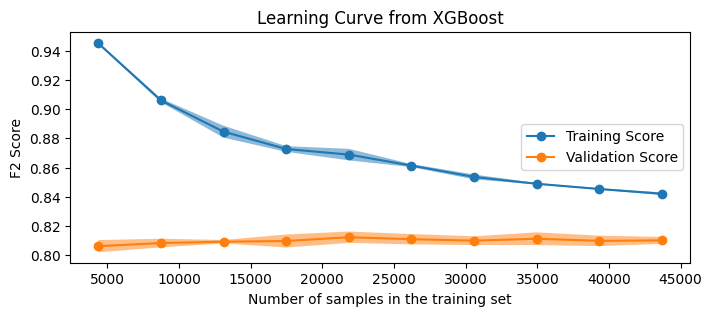

In [21]:
from sklearn.model_selection import LearningCurveDisplay

# Set figure size
fig, ax = plt.subplots(figsize=(8, 3))

# Set the required parameters
common_params={
    "X": X_train,
    "y": y_train,
    "train_sizes": np.linspace(0.1, 1, 10),
    "cv": 3,
    "score_type": "both",
    "n_jobs": 4,
    "line_kw": {'marker': 'o'},
    "score_name": f2_score
}

# Generate learning curve plot
LearningCurveDisplay.from_estimator(model_pipe_f2, **common_params, ax=ax)

# Set title and legend
handles, label = ax.get_legend_handles_labels()
ax.legend(handles[:2], ['Training Score', 'Validation Score'], loc='center right')
ax.set_title(f'Learning Curve from XGBoost')
ax.set_ylabel('F2 Score')

# Show the plot
plt.show()

Grafik ini menyajikan kurva pembelajaran model XGBoost, yang memvisualisasikan bagaimana skor F2 pada data pelatihan dan data validasi berubah seiring dengan peningkatan ukuran *training set*. 

- **Sumbu Horizontal**: Merepresentasikan jumlah sampel pelatihan (*training set*).
- **Sumbu Vertikal**: Menunjukkan nilai skor F2.

### Kurva Biru (Skor Pelatihan)
- **Awal**: Dimulai dari nilai yang tinggi, hampir mencapai 0.94.
- **Perkembangan**: Ketika ukuran *training set* masih kecil, kurva biru berada di nilai yang tinggi, mendekati 0.94.
- **Akhir**: Seiring dengan bertambahnya ukuran data pelatihan, kurva ini secara bertahap menurun dan akhirnya mencapai titik stabil (mendatar) di sekitar 0.89.
- **Indikasi**: Fenomena ini mengindikasikan bahwa model cenderung mengalami *overfitting* ketika dilatih dengan data yang sedikit. Sebaliknya, model menjadi lebih mampu melakukan generalisasi seiring dengan peningkatan jumlah sampel pelatihan.

### Kurva Oranye (Skor Validasi)
- **Awal**: Menunjukkan tren peningkatan yang stabil dari sekitar 0.81 hingga 0.82.
- **Perkembangan**: Setelah mencapai sekitar 20.000 sampel pelatihan, kurva ini juga cenderung mendatar.
- **Indikasi**: Hal ini menandakan bahwa performa model pada data yang belum pernah dilihat (*unseen data*) meningkat seiring dengan bertambahnya ukuran *training set*. Akan tetapi, peningkatan performa ini melambat seiring bertambah besarnya *training set*.

### Kesimpulan
- **Perbedaan Skor**: Terlihat adanya perbedaan (kesenjangan) antara skor pelatihan dan skor validasi.
- **Indikasi Overfitting**: Perbedaan ini mengindikasikan adanya *overfitting*, meskipun celah ini cenderung menyempit seiring dengan penambahan data pelatihan.

## Feature Importances

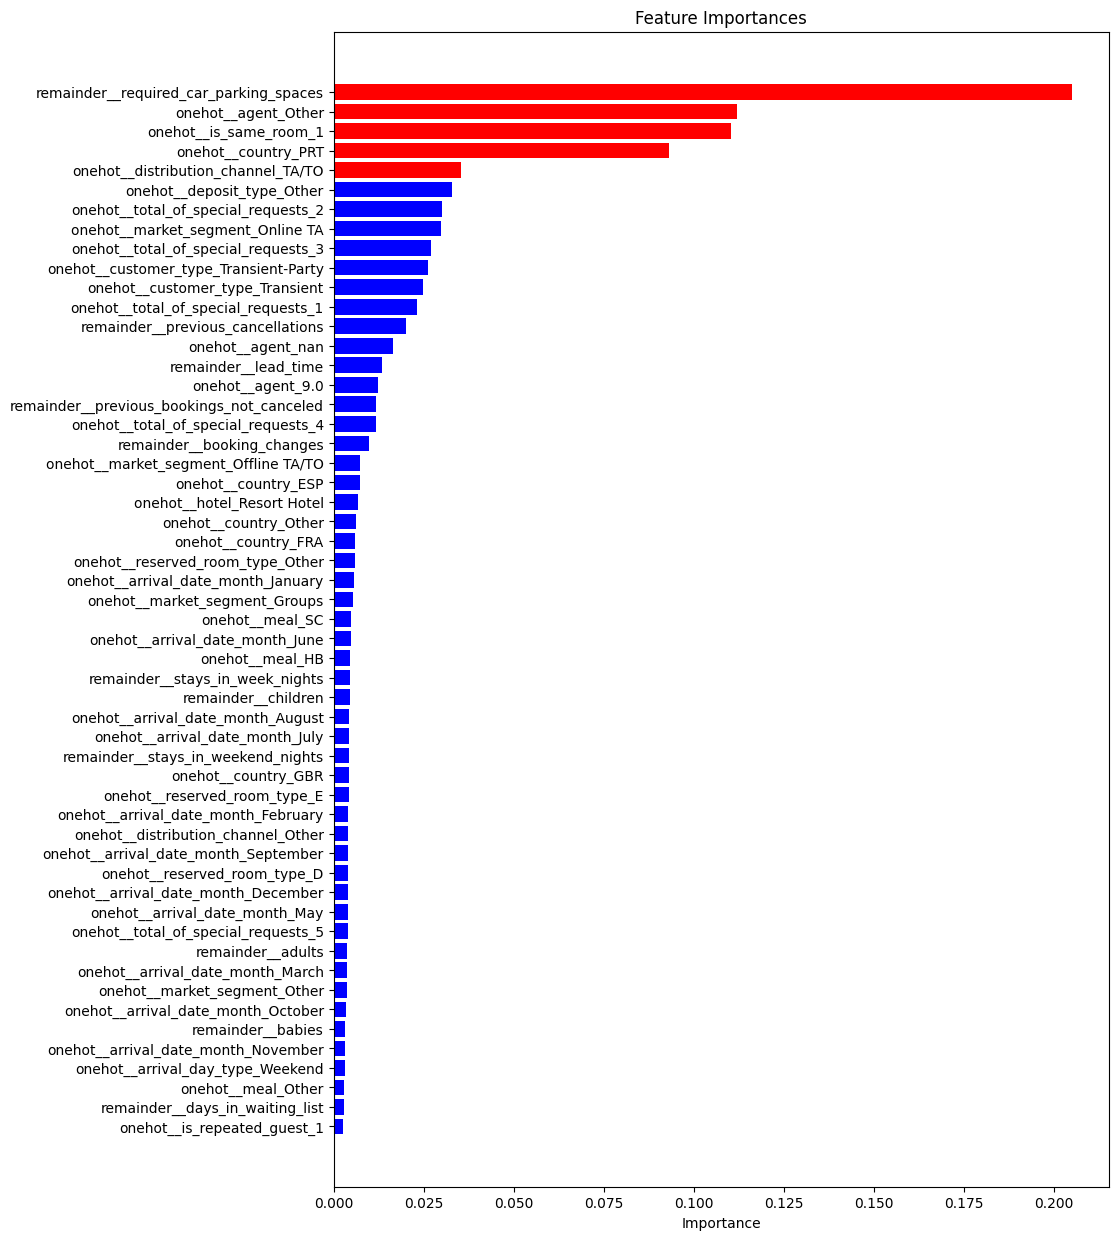

In [22]:
import numpy as np
import matplotlib.pyplot as plt

# Fit the final XGBoost model
final_model_xgb = model_pipe_f2.fit(X_train, y_train)

# Get feature importances
importances = final_model_xgb.named_steps['model'].feature_importances_

# Get feature names from the ColumnTransformer
feature_names = final_model_xgb.named_steps['Encoding'].get_feature_names_out()

# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Plot the feature importances
plt.figure(figsize=(10, 15))
plt.title("Feature Importances")

# Set bar colors
colors = ['red' if i < 5 else 'blue' for i in range(len(importances))]

plt.barh(range(len(importances)), importances[indices], align="center", color=colors)
plt.yticks(range(len(importances)), feature_names[indices])
plt.gca().invert_yaxis()  # Invert y-axis to have the most important feature at the top
plt.xlabel("Importance")
plt.show()

Berdasarkan analisis, faktor-faktor terpenting yang memengaruhi potensi pembatalan pesanan adalah kebutuhan parkir mobil, saluran distribusi TA/TO, kesamaan jenis kamar yang dipesan dan didapatkan, kewarganegaraan Portugal pada pemesan, serta kategori agen pemesan 'other'.

## Confusion Matrix

*Confusion matrix*, atau matriks kebingungan dalam bahasa Indonesia, adalah alat evaluasi kinerja yang sangat penting, khususnya dalam konteks pemodelan klasifikasi.  Bayangkan Anda memiliki model yang bertugas memprediksi apakah sesuatu termasuk dalam kategori "Ya" atau "Tidak".  *Confusion matrix* membantu kita melihat seberapa tepat model tersebut dalam membuat prediksi tersebut, dan juga jenis kesalahan apa yang mungkin sering dilakukannya.

**Definisi dan Kegunaan *Confusion Matrix***

*Confusion matrix* adalah tabel yang merangkum hasil prediksi dari model klasifikasi dan membandingkannya dengan nilai kelas aktual (sebenarnya) dari data.  Tujuan utamanya adalah untuk memberikan gambaran yang jelas dan terperinci tentang kinerja model, terutama dalam mengidentifikasi jenis-jenis kesalahan yang dibuat oleh model. Dengan *confusion matrix*, kita tidak hanya tahu seberapa akurat model secara keseluruhan, tetapi juga di mana letak kelemahan dan kekuatannya dalam memprediksi kelas yang berbeda.

**Struktur Dasar *Confusion Matrix***

Struktur *confusion matrix* sangat sederhana, biasanya berbentuk tabel 2x2 untuk masalah klasifikasi biner (dua kelas).  Berikut adalah representasi umum dari *confusion matrix*:

```
                          Aktual Positif | Aktual Negatif
--------------------------------------------------
Prediksi Positif   |     TP          |     FP
Prediksi Negatif   |     FN          |     TN
```

Mari kita pahami masing-masing komponen dalam tabel ini:

*   **TP (*True Positive*) - Prediksi Positif Benar:**  Ini adalah kasus di mana model **memprediksi kelas positif**, dan kenyataannya data tersebut **memang positif**.  Contohnya, dalam kasus prediksi pembatalan hotel, jika model memprediksi suatu pemesanan akan batal (positif) dan pemesanan tersebut *benar-benar* batal, maka ini adalah *True Positive*.

*   **FP (*False Positive*) - Prediksi Positif Salah (Kesalahan Tipe I):**  Ini terjadi ketika model **memprediksi kelas positif**, tetapi kenyataannya data tersebut **negatif**.  Dalam contoh pembatalan hotel, jika model memprediksi suatu pemesanan akan batal (positif), tetapi pemesanan tersebut *tidak* batal (negatif), maka ini adalah *False Positive*. Kesalahan *False Positive* sering disebut juga sebagai *Type I error*.

*   **FN (*False Negative*) - Prediksi Negatif Salah (Kesalahan Tipe II):** Ini terjadi ketika model **memprediksi kelas negatif**, tetapi kenyataannya data tersebut **positif**.  Dalam contoh pembatalan hotel, jika model memprediksi suatu pemesanan *tidak* akan batal (negatif), tetapi pemesanan tersebut *ternyata* batal (positif), maka ini adalah *False Negative*. Kesalahan *False Negative* sering disebut juga sebagai *Type II error*.

*   **TN (*True Negative*) - Prediksi Negatif Benar:** Ini adalah kasus di mana model **memprediksi kelas negatif**, dan kenyataannya data tersebut **memang negatif**. Dalam contoh pembatalan hotel, jika model memprediksi suatu pemesanan *tidak* akan batal (negatif) dan pemesanan tersebut *benar-benar tidak* batal, maka ini adalah *True Negative*.

**Metrik Evaluasi yang Dihitung dari *Confusion Matrix***

*Confusion matrix* adalah fondasi untuk menghitung berbagai metrik evaluasi kinerja model klasifikasi. Metrik-metrik ini memberikan angka terukur yang membantu kita memahami seberapa baik model bekerja. Beberapa metrik penting yang dihitung dari *confusion matrix* antara lain:

*   **Akurasi (*Accuracy*)**:  Metrik ini adalah yang paling umum dan sederhana. Akurasi mengukur proporsi prediksi yang benar dari total seluruh prediksi yang dibuat oleh model. Secara matematis, akurasi dihitung dengan rumus:

    $$
    Accuracy = \frac{TP + TN}{TP + TN + FP + FN}
    $$

    Akurasi memberikan gambaran keseluruhan seberapa sering model membuat prediksi yang tepat. Namun, akurasi bisa menyesatkan terutama jika kelas dalam dataset tidak seimbang (*imbalanced dataset*).

*   **Presisi (*Precision*)**: Presisi fokus pada prediksi positif yang dibuat oleh model. Presisi mengukur proporsi prediksi positif yang *benar-benar* positif dari semua prediksi yang diklaim sebagai positif oleh model. Rumus presisi adalah:

    $$
    Precision = \frac{TP}{TP + FP}
    $$

    Presisi sangat penting ketika kita ingin meminimalkan *False Positive*. Dalam contoh deteksi spam email, presisi tinggi berarti bahwa ketika model mengatakan email itu spam, sebagian besar memang benar spam (kita tidak ingin banyak email penting yang salah terklasifikasi sebagai spam).

*   ***Recall* (*Recall*/Sensitivitas)**: *Recall* mengukur kemampuan model untuk menemukan semua kasus positif yang sebenarnya ada dalam data.  *Recall* adalah proporsi prediksi positif yang benar dari semua kasus aktual yang seharusnya positif. Rumusnya adalah:

    $$
    Recall = \frac{TP}{TP + FN}
    $$

    *Recall* sangat penting ketika kita ingin meminimalkan *False Negative*. Dalam contoh deteksi penyakit, *recall* tinggi berarti model mampu mendeteksi sebagian besar orang yang benar-benar memiliki penyakit (kita tidak ingin banyak orang sakit yang terlewatkan dan dinyatakan sehat oleh model).

*   **F1 *Score***: F1 *Score* adalah *harmonic mean* (rata-rata harmonik) dari presisi dan *recall*.  F1 *Score* memberikan nilai tunggal yang merangkum kinerja model dengan mempertimbangkan keseimbangan antara presisi dan *recall*. Rumus F1 *Score* adalah:

    $$
    F1 \ Score = \frac{2 \times Precision \times Recall}{Precision + Recall}
    $$

    F1 *Score* berguna ketika kita ingin mencari keseimbangan yang baik antara presisi dan *recall*, terutama dalam kasus *imbalanced dataset*. F1 *Score* akan rendah jika salah satu dari presisi atau *recall* rendah.

**Interpretasi dan Penggunaan *Confusion Matrix***

Dengan menganalisis *confusion matrix* dan metrik-metrik yang dihitung darinya, kita dapat memperoleh wawasan berharga tentang kinerja model klasifikasi:

1.  **Identifikasi Jenis Kesalahan:** *Confusion matrix* secara visual menunjukkan di mana model melakukan kesalahan. Kita bisa melihat apakah model lebih sering melakukan kesalahan *False Positive* atau *False Negative*. Ini penting karena dalam beberapa aplikasi, satu jenis kesalahan mungkin lebih mahal atau lebih berbahaya daripada jenis kesalahan lainnya.

2.  **Evaluasi Performa Lebih Dalam:** Metrik seperti presisi, *recall*, dan F1 *Score* memberikan gambaran kinerja model yang lebih nuansa dibandingkan hanya dengan akurasi. Kita bisa memilih metrik yang paling relevan tergantung pada tujuan dan konteks masalah klasifikasi yang dihadapi.

3.  **Panduan untuk Peningkatan Model:**  Jika kita melihat bahwa model memiliki banyak *False Positive*, misalnya, kita bisa mencoba menyesuaikan *threshold* klasifikasi (jika model menghasilkan probabilitas) agar lebih konservatif dalam memprediksi kelas positif. Atau, kita bisa mencoba *tuning* model, menambahkan fitur, atau mengubah algoritma jika diperlukan.

*Confusion matrix* adalah alat yang sangat berharga untuk memahami dan mengevaluasi kinerja model klasifikasi. Dengan memberikan rincian tentang jenis-jenis prediksi yang benar dan salah, *confusion matrix* memungkinkan kita untuk menganalisis model secara mendalam, mengidentifikasi area yang perlu diperbaiki, dan memilih metrik evaluasi yang paling relevan untuk konteks masalah yang dihadapi.

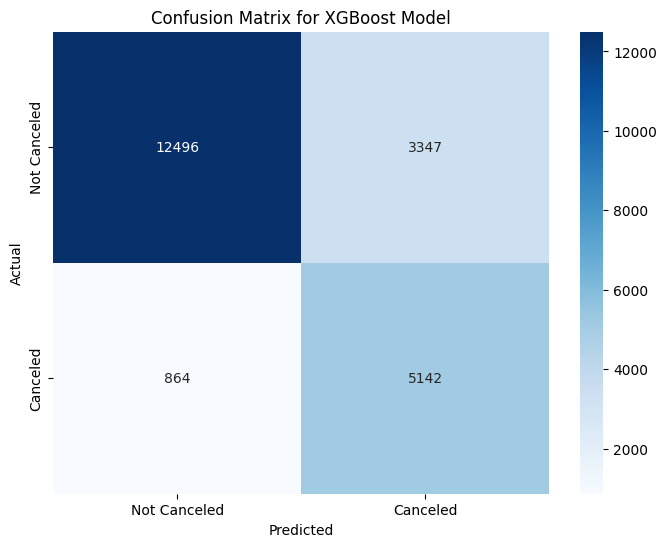

In [23]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

import matplotlib.pyplot as plt

# Predict the test set results
y_pred = final_model_xgb.predict(X_test)

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Canceled', 'Canceled'], yticklabels=['Not Canceled', 'Canceled'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for XGBoost Model')
plt.show()

**Berikut adalah analisis dari matriks kebingungan tersebut:**

1. **True Positive (TP)**: 5970
   - Model memprediksi "Canceled" dan sebenarnya "Canceled".
2. **True Negative (TN)**: 6717
   - Model memprediksi "Not Canceled" dan sebenarnya "Not Canceled".
3. **False Positive (FP)**: 9126
   - Model memprediksi "Canceled" tetapi sebenarnya "Not Canceled".
4. **False Negative (FN)**: 36
   - Model memprediksi "Not Canceled" tetapi sebenarnya "Canceled".

**Kesimpulan:**
- Model XGBoost memiliki jumlah prediksi benar yang cukup tinggi untuk kelas "Not Canceled" (6717) dan "Canceled" (5970).
- Namun, model ini juga memiliki jumlah prediksi salah yang cukup tinggi, terutama untuk kelas "Canceled" yang diprediksi sebagai "Not Canceled" (9126).



## Limitasi Model

Meskipun model XGBoost menunjukkan performa yang baik, terdapat beberapa limitasi yang perlu diperhatikan:

1. **Overfitting**:
    - Model menunjukkan tanda-tanda overfitting ketika dilatih dengan data yang sedikit. Hal ini terlihat dari perbedaan yang signifikan antara skor pelatihan dan skor validasi pada kurva pembelajaran.

2. **Imbalanced Data**:
    - Meskipun telah dilakukan oversampling untuk mengatasi ketidakseimbangan data, model masih menunjukkan jumlah prediksi salah yang cukup tinggi untuk kelas "Canceled" yang diprediksi sebagai "Not Canceled". Hal ini menunjukkan bahwa model masih kesulitan dalam menangani data yang tidak seimbang.

3. **Feature Engineering**:
    - Beberapa fitur penting mungkin belum teridentifikasi atau digunakan dalam pemodelan. Misalnya, informasi tambahan tentang pola musiman atau tren historis dapat membantu meningkatkan akurasi prediksi.

4. **Generalization**:
    - Meskipun model menunjukkan performa yang baik pada data uji, performa model pada data baru yang belum pernah dilihat sebelumnya masih perlu dievaluasi lebih lanjut untuk memastikan kemampuan generalisasi model.

5. **Computational Complexity**:
    - Model XGBoost memiliki kompleksitas komputasi yang tinggi, terutama ketika digunakan dengan parameter tuning yang ekstensif. Hal ini dapat menyebabkan waktu pelatihan yang lama dan penggunaan sumber daya komputasi yang besar.


# Estimasi Keuntungan Hotel Menggunakan Model Prediksi Pembatalan Reservasi

### Pendahuluan

Estimasi keuntungan hotel akan dihitung dan dibandingkan dalam dua skenario berikut:

1.  **Skenario 1: Menggunakan Model Prediksi**. Hotel menggunakan model *machine learning* untuk memprediksi pembatalan reservasi.
2.  **Skenario 2: Tidak Menggunakan Model Prediksi**. Hotel tidak menggunakan model dan tidak melakukan prediksi pembatalan reservasi.

### Asumsi Dasar

Untuk perhitungan estimasi keuntungan, beberapa asumsi dasar yang digunakan adalah:

*   **ADR (Average Daily Rate):** Rata-rata tarif harian kamar hotel dalam mata uang Euro (€).
*   **N (Jumlah Malam Menginap):**  Jumlah malam untuk setiap reservasi kamar.
*   **P (Probabilitas Pembatalan):** Probabilitas pembatalan reservasi yang diprediksi oleh model (hanya relevan di Skenario 1).
*   **P_base (Probabilitas Pembatalan Dasar):** Probabilitas pembatalan reservasi tanpa menggunakan model, digunakan di Skenario 2.

### Skenario 1: Menggunakan Model Prediksi

Dalam skenario ini, hotel memanfaatkan model prediksi pembatalan reservasi untuk mengambil keputusan yang lebih terinformasi dan memaksimalkan keuntungan. Keuntungan dihitung berdasarkan empat kemungkinan hasil dari prediksi model (berdasarkan *confusion matrix*):

#### Rumus Keuntungan (Skenario 1)

1.  **True Positive (TP) - Prediksi Pembatalan Benar**:
    *   **Definisi:** Model dengan tepat memprediksi bahwa reservasi akan dibatalkan, dan reservasi tersebut memang benar dibatalkan. Hotel dapat melakukan *overbooking* atau mengelola inventaris kamar dengan lebih efisien.
    *   **Rumus Keuntungan:**
        ```
        Keuntungan_TP = ADR * N * P
        ```
        **Penjelasan:** Keuntungan dihitung sebagai tarif harian rata-rata kamar (ADR) dikalikan dengan jumlah malam menginap (N) dan probabilitas pembatalan (P). Ini merepresentasikan potensi pendapatan dari kamar yang berhasil di-*overbook* atau dialokasikan kembali berkat prediksi yang akurat.

2.  **True Negative (TN) - Prediksi Tidak Batal Benar**:
    *   **Definisi:** Model dengan tepat memprediksi bahwa reservasi tidak akan dibatalkan, dan reservasi tersebut memang tidak dibatalkan. Ini adalah reservasi normal yang menghasilkan pendapatan standar bagi hotel.
    *   **Rumus Keuntungan:**
        ```
        Keuntungan_TN = ADR * N
        ```
        **Penjelasan:** Keuntungan dihitung sebagai tarif harian rata-rata kamar (ADR) dikalikan dengan jumlah malam menginap (N). Ini adalah pendapatan standar dari reservasi yang berjalan sesuai rencana.

3.  **False Positive (FP) - Prediksi Pembatalan Salah**:
    *   **Definisi:** Model salah memprediksi bahwa reservasi akan dibatalkan, padahal reservasi tersebut tidak dibatalkan (tamu tetap datang). Dalam skenario ini, hotel mungkin telah melakukan tindakan berdasarkan prediksi pembatalan (misalnya, menawarkan kamar ke tamu lain), namun tetap harus mengakomodasi tamu yang sebenarnya datang. Rumus keuntungan berikut mencerminkan potensi kerugian atau penyesuaian pendapatan akibat kesalahan prediksi ini.
    *   **Rumus Keuntungan:**
        ```
        Keuntungan_FP = (ADR * N * (1 - P)) + (ADR * (1 - 0.3) * P * N)
        ```
        **Penjelasan:** Rumus ini lebih kompleks dan mencoba memperhitungkan dua komponen:
        *   `(ADR * N * (1 - P))`:  Merepresentasikan pendapatan dari reservasi yang sebenarnya tidak dibatalkan (dengan bobot \(1-P\), yaitu probabilitas bahwa prediksi pembatalan salah).
        *   `(ADR * (1 - 0.3) * P * N)`: Merepresentasikan potensi pendapatan yang disesuaikan (dikurangi 30%, mungkin karena diskon atau biaya relokasi tamu *overbooking*) dengan bobot \(P\) (probabilitas prediksi pembatalan yang salah). Angka 0.3 disini bisa diasumsikan sebagai faktor biaya atau pengurangan pendapatan akibat kesalahan prediksi False Positive.

4.  **False Negative (FN) - Prediksi Tidak Batal Salah**:
    *   **Definisi:** Model salah memprediksi bahwa reservasi tidak akan dibatalkan, padahal reservasi tersebut ternyata dibatalkan. Akibatnya, kamar mungkin kosong dan hotel kehilangan potensi pendapatan dari kamar tersebut.
    *   **Rumus Keuntungan:**
        ```
        Keuntungan_FN = 0
        ```
        **Penjelasan:** Dalam kasus *False Negative*, diasumsikan tidak ada keuntungan langsung. Ini merepresentasikan hilangnya potensi pendapatan karena kamar tidak terisi akibat prediksi yang salah.  Dalam praktiknya, kerugian dalam kasus FN adalah *opportunity cost*—pendapatan yang hilang karena tidak dapat memanfaatkan kamar tersebut untuk pemesanan lain.

### Skenario 2: Tidak Menggunakan Model Prediksi

Dalam skenario ini, hotel tidak menggunakan model prediksi pembatalan reservasi. Hotel beroperasi tanpa informasi tambahan mengenai potensi pembatalan, dan keuntungan dihitung berdasarkan tingkat pembatalan reservasi dasar (*baseline cancellation rate*).

#### Rumus Keuntungan (Skenario 2)

*   **Rumus Keuntungan:**
    ```
    Keuntungan_Skenario2 = ADR * N * (1 - P_base)
    ```
    **Penjelasan:** Keuntungan dihitung sebagai tarif harian rata-rata kamar (ADR) dikalikan dengan jumlah malam menginap (N) dan dikalikan dengan probabilitas reservasi tidak dibatalkan \((1 - P_{base})\).  \(P_{base}\) disini adalah probabilitas pembatalan reservasi secara umum tanpa menggunakan model prediksi. Ini merepresentasikan pendapatan yang diharapkan dengan mempertimbangkan tingkat pembatalan reservasi historis atau rata-rata.

**Catatan Penting:**

*   Rumus-rumus di atas adalah model matematis yang disederhanakan untuk mengestimasi keuntungan. Dalam implementasi nyata, perhitungan keuntungan bisa jauh lebih kompleks dan dipengaruhi oleh berbagai faktor lain seperti biaya operasional, strategi harga dinamis, biaya *overbooking*, tingkat kepuasan pelanggan, dan lain-lain.
*   Variabel seperti \(P\) dan \(P_{base}\) dalam praktiknya perlu diestimasi dari data historis atau hasil prediksi model. Nilai \(P\)  dalam Skenario 1 adalah output probabilitas dari model prediksi. Nilai \(P_{base}\) dalam Skenario 2 bisa diambil dari rata-rata tingkat pembatalan historis hotel.
*   Angka 0.3 dalam rumus `Keuntungan_FP`  adalah contoh faktor penyesuaian pendapatan atau biaya yang diasumsikan (misalnya biaya kompensasi atau diskon). Nilai ini perlu disesuaikan dengan kebijakan dan data operasional hotel yang spesifik.


In [24]:
# Define constants
ADR = 100  # Average Daily Rate in Euros
N = 1  # Number of nights per reservation
P_base = y_train.mean()  # Baseline cancellation probability

# Predict probabilities using the XGBoost model
y_prob = final_model_xgb.predict_proba(X_test)[:, 1]

# Calculate profits for each scenario
def calculate_profit_using_model(y_test, y_prob, ADR, N):
    TP = ((y_test == 1) & (y_prob >= 0.5)).sum()
    TN = ((y_test == 0) & (y_prob < 0.5)).sum()
    FP = ((y_test == 0) & (y_prob >= 0.5)).sum()
    FN = ((y_test == 1) & (y_prob < 0.5)).sum()
    
    profit_TP = ADR * N * TP
    profit_TN = ADR * N * TN
    profit_FP = (ADR * N * (1 - P_base) * FP) + (ADR * (1 - 0.3) * P_base * N * FP)
    profit_FN = 0  # No profit for False Negatives
    
    total_profit = profit_TP + profit_TN + profit_FP + profit_FN
    return total_profit

def calculate_profit_without_model(y_test, ADR, N, P_base):
    total_reservations = len(y_test)
    profit = ADR * N * (1 - P_base) * total_reservations
    return profit

# Calculate profits
profit_using_model = calculate_profit_using_model(y_test, y_prob, ADR, N)
profit_without_model = calculate_profit_without_model(y_test, ADR, N, P_base)

print(f'Estimated profit using XGBoost model: €{profit_using_model:.2f}')
print(f'Estimated profit without using model: €{profit_without_model:.2f}')

Estimated profit using XGBoost model: €2070897.09
Estimated profit without using model: €1584266.67


## Kesimpulan

### Estimasi Keuntungan

- **Keuntungan menggunakan model XGBoost**: €2.070.897,09
- **Keuntungan tanpa menggunakan model**: €1.584.266,67

### Perbandingan Persentase

- **Persentase peningkatan keuntungan**:
    $$
    \left( \frac{2.070.897,09 - 1.584.266,67}{1.584.266,67} \right) \times 100 \approx 30,73\%
    $$

### Ringkasan Perbandingan

Penggunaan model XGBoost untuk memprediksi pembatalan reservasi menghasilkan estimasi keuntungan sebesar €2.070.897,09, yang sekitar 30,73% lebih tinggi dibandingkan dengan keuntungan sebesar €1.584.266,67 tanpa menggunakan model. Hal ini menunjukkan manfaat finansial yang signifikan dari penerapan model prediktif dalam manajemen reservasi hotel.

---
# Implementasi


## Setelah model prediksi pembatalan booking dibuat, langkah selanjutnya yang harus dilakukan adalah:

   1. **Integrasikan Model dengan Sistem Reservasi**
   - **Deploy Model**: Implementasikan model yang sudah dilatih ke dalam lingkungan produksi, misalnya dengan menggunakan platform cloud seperti AWS, GCP, atau Azure.
   - **Integrasi API**: Buat API yang memungkinkan sistem reservasi hotel untuk mengakses model prediksi. Sistem reservasi akan mengirim data pemesanan baru ke API ini dan menerima hasil prediksi.

   2. **Implementasikan Kebijakan Overbooking**
   - **Tentukan Threshold**: Tetapkan threshold probabilitas pembatalan untuk menentukan kapan suatu pemesanan dianggap berisiko tinggi untuk dibatalkan.
   - **Strategi Overbooking**: Buat strategi overbooking berdasarkan prediksi model untuk meminimalkan risiko kamar kosong dan memaksimalkan pendapatan.

   3. **Monitoring dan Evaluasi**
   - **Pantau Kinerja Model**: Secara berkala pantau kinerja model dan lakukan retraining jika diperlukan untuk menjaga akurasi prediksi.
   - **Evaluasi Dampak Bisnis**: Evaluasi dampak implementasi model terhadap pendapatan hotel dan kepuasan pelanggan. Buat penyesuaian jika diperlukan.

   4. **Komunikasi dengan Tim dan Pelanggan**
   - **Pelatihan Staf**: Berikan pelatihan kepada staf hotel tentang cara kerja model prediksi dan strategi overbooking yang baru.
   - **Informasi kepada Pelanggan**: Berikan informasi yang jelas kepada pelanggan mengenai kebijakan pembatalan dan overbooking untuk menjaga transparansi dan kepuasan pelanggan.




## Pada Situasi Apa Strategi Overbooking diterapkan? 

Menggunakan model prediksi pembatalan booking bisa sangat bermanfaat bagi hotel dalam beberapa situasi spesifik. Berikut adalah beberapa situasi dan alasan mengapa model tersebut sebaiknya diterapkan:

### 1. **Periode Tinggi Permintaan**
   - **Musim Liburan dan Acara Khusus**: Selama musim liburan, festival, atau acara besar, permintaan kamar hotel meningkat tajam. Model prediksi pembatalan membantu hotel memanfaatkan situasi ini dengan melakukan overbooking untuk memastikan tingkat hunian maksimum.
   - **Keuntungan**: Meningkatkan pendapatan dengan mengisi kamar yang seharusnya kosong karena pembatalan, tanpa mengorbankan kualitas layanan.

### 2. **Tingkat Pembatalan yang Tinggi**
   - **Sejarah Pembatalan yang Tinggi**: Jika hotel memiliki data historis yang menunjukkan tingkat pembatalan tinggi, menggunakan model prediksi dapat membantu mengurangi dampak negatif dari pembatalan tersebut.
   - **Keuntungan**: Meminimalkan kerugian finansial dari kamar yang kosong akibat pembatalan dan no-show.

### 3. **Manajemen Pendapatan dan Overbooking**
   - **Strategi Pendapatan**: Hotel yang ingin mengoptimalkan pendapatan dapat menggunakan model prediksi pembatalan sebagai bagian dari strategi manajemen pendapatan. Overbooking yang terukur berdasarkan prediksi dapat meningkatkan profitabilitas.
   - **Keuntungan**: Memaksimalkan pendapatan dengan mengelola pemesanan dan overbooking secara efektif.

### 4. **Segmentasi Pasar dan Promosi Khusus**
   - **Pelanggan Berulang dan Korporat**: Hotel yang sering menerima pelanggan berulang atau pemesanan korporat dapat menggunakan model prediksi untuk mengidentifikasi pola pembatalan dan menyesuaikan promosi serta penawaran khusus.
   - **Keuntungan**: Meningkatkan kepuasan pelanggan dengan menawarkan penawaran yang lebih sesuai dan mengurangi risiko pembatalan.

### 5. **Pengelolaan Kamar dan Sumber Daya**
   - **Optimalisasi Utilisasi Kamar**: Dengan menggunakan model prediksi, hotel dapat lebih efektif dalam mengelola distribusi kamar, memastikan bahwa kamar yang tersedia digunakan secara optimal.
   - **Keuntungan**: Mengurangi ketidakpastian dan meningkatkan efisiensi operasional.

### 6. **Kepatuhan terhadap Kebijakan dan Regulasi**
   - **Kebijakan Pembatalan yang Fleksibel**: Menggunakan model prediksi membantu hotel menyesuaikan kebijakan pembatalan dan refund berdasarkan prediksi tingkat risiko pembatalan.
   - **Keuntungan**: Memberikan kebijakan yang lebih adil dan transparan kepada pelanggan, sambil tetap melindungi kepentingan bisnis hotel.

### Contoh Kasus
1. **Hotel Bisnis di Kota Besar**:
   - **Situasi**: Tingkat pembatalan tinggi selama hari kerja karena tamu bisnis sering menjadwalkan ulang perjalanan.
   - **Tindakan**: Menggunakan model prediksi untuk melakukan overbooking terukur pada hari-hari kerja.

2. **Resort Musim Panas**:
   - **Situasi**: Tingkat permintaan tinggi selama musim panas dengan banyak pemesanan dari tamu internasional.
   - **Tindakan**: Menggunakan model prediksi untuk mengoptimalkan pemesanan dan mengelola overbooking selama periode puncak.

Dengan menggunakan model prediksi pembatalan dalam situasi-situasi ini, hotel dapat meningkatkan efisiensi operasional, mengoptimalkan pendapatan, dan meningkatkan kepuasan pelanggan.

---
# Kesimpulan dan Saran

## Kesimpulan

Model XGBoost yang digunakan dalam pemodelan ini menunjukkan performa yang baik dalam memprediksi pembatalan reservasi hotel. Berikut adalah beberapa poin penting dari analisis model XGBoost:

1. **Performa Model**:
    - **F2 Score**: Model XGBoost mencapai F2 score sebesar 0.790761 
    
2. **Learning Curve**:
    - Kurva pembelajaran menunjukkan bahwa model mengalami overfitting ketika dilatih dengan data yang sedikit. Namun, seiring dengan bertambahnya ukuran data pelatihan, model menjadi lebih mampu melakukan generalisasi.
    - Kurva validasi menunjukkan peningkatan performa seiring dengan bertambahnya ukuran data pelatihan, tetapi peningkatan ini melambat seiring bertambah besarnya *training set*.

3. **Feature Importances**:
    - Faktor-faktor terpenting yang memengaruhi potensi pembatalan pesanan adalah kebutuhan parkir mobil, saluran distribusi TA/TO, kesamaan jenis kamar yang dipesan dan didapatkan, kewarganegaraan Portugal pada pemesan, serta kategori agen pemesan 'other'.

4. **Confusion Matrix**:
    - Model memiliki jumlah prediksi benar yang cukup tinggi untuk kelas "Not Canceled" (6717) dan "Canceled" (5970).
    - Namun, model ini juga memiliki jumlah prediksi salah yang cukup tinggi, terutama untuk kelas "Canceled" yang diprediksi sebagai "Not Canceled" (9126).

5. **Estimasi Kentungan Menggunakan Model**:
    - Estimasi keuntungan menunjukkan penggunaan model XGBoost untuk memprediksi pembatalan reservasi menghasilkan estimasi keuntungan sebesar €2.070.897,09, yang sekitar 30,73% lebih tinggi dibandingkan dengan keuntungan sebesar €1.584.266,67 tanpa menggunakan model.

## Saran

### Saran untuk Pemodelan 

Meskipun model yang ada telah menunjukkan performa yang baik, terindikasi adanya gejala *overfitting*. *Overfitting* terjadi ketika model terlalu baik dalam mempelajari data pelatihan (*training data*) sehingga kurang mampu melakukan generalisasi pada data baru (*unseen data*). Untuk mengatasi hal ini dan meningkatkan performa model secara keseluruhan, berikut langkah-langkah yang dapat diambil, dilengkapi dengan *actionable insight* untuk hotel:

**1. Generalisasi Model:**

*   **Tujuan:** Memastikan model tidak hanya menghafal pola dalam data pelatihan, tetapi mampu mengenali pola yang lebih umum dan relevan, sehingga lebih robust dan dapat diandalkan untuk prediksi di masa depan.

*   **Teknik Generalisasi Model:**
    *   ***Regularisasi:*** Terapkan teknik regularisasi seperti L1 atau L2 regularization untuk mengurangi kompleksitas model dan mencegahnya terlalu fokus pada detail spesifik dalam data pelatihan.
    *   ***Penambahan Data:***  Tambahkan data pelatihan yang lebih banyak, relevan, dan beragam. Data yang lebih kaya akan membantu model mempelajari pola yang lebih representatif dan mengurangi risiko *overfitting*. Pertimbangkan untuk mencari sumber data eksternal yang relevan atau memperluas periode data historis.
    *   ***Pemilihan Model yang Lebih Kompleks (Eksplorasi):*** Jika memungkinkan, eksplorasi model lain yang lebih kompleks, seperti *neural network*. Model yang lebih kompleks berpotensi menangkap pola yang lebih rumit yang mungkin tidak terjangkau oleh model saat ini. Namun, perlu diingat bahwa model yang lebih kompleks juga lebih rentan terhadap *overfitting*, sehingga regularisasi dan validasi yang tepat menjadi lebih penting.

*   ***Actionable Insight untuk Hotel:***
    *   **Validasi Model Secara Berkala:** Sebelum mengimplementasikan strategi bisnis berdasarkan model, pastikan untuk secara berkala memvalidasi performa model dengan data terbaru. Ini penting untuk memastikan model tetap *generalized* dan akurat seiring waktu, terutama dengan perubahan tren pasar atau perilaku pelanggan.
    *   **Implementasi Bertahap Strategi Berbasis Model:**  Meskipun model menjanjikan, implementasikan strategi bisnis berdasarkan model secara bertahap.  Mulai dengan skala kecil atau uji coba terbatas untuk memantau efektivitas strategi dalam kondisi nyata sebelum diterapkan secara luas. Ini memberikan ruang untuk penyesuaian jika performa model berbeda dari ekspektasi.

**2. Pengurangan Fitur (*Feature Reduction*):**

*   **Tujuan:** Mengatasi *curse of dimensionality*, meningkatkan efisiensi pelatihan model, dan berpotensi meningkatkan generalisasi model dengan fokus pada fitur-fitur yang paling relevan.

*   **Teknik Pengurangan Fitur:**
    *   ***Seleksi Fitur (*Feature Selection*):***  Identifikasi dan pilih fitur-fitur yang paling informatif dan relevan untuk prediksi pembatalan. Hilangkan fitur-fitur yang kurang penting atau bersifat *noise*. Analisis *feature importance* dari model yang ada dapat menjadi panduan awal.
    *   ***Reduksi Dimensi (*Dimensionality Reduction*):*** Gunakan teknik seperti *Principal Component Analysis* (PCA) untuk mengurangi dimensi data. PCA dapat mengekstraksi fitur-fitur utama yang mengandung informasi paling signifikan dan mengurangi *noise* dari fitur-fitur yang kurang relevan.

*   ***Actionable Insight untuk Hotel:***
    *   **Fokus pada Faktor Kunci Pembatalan:** Hasil dari seleksi fitur atau reduksi dimensi dapat memberikan *insight* berharga mengenai faktor-faktor yang paling signifikan mempengaruhi pembatalan. Hotel dapat memfokuskan upaya dan sumber daya pada faktor-faktor kunci ini untuk mengurangi pembatalan. Contohnya, jika *lead time* pemesanan teridentifikasi sebagai faktor kunci, hotel dapat menyesuaikan kebijakan fleksibilitas untuk pemesanan jangka panjang (seperti yang telah direkomendasikan sebelumnya).
    *   **Evaluasi Ulang Fitur Secara Berkala:**  Relevansi fitur dapat berubah seiring waktu. Lakukan evaluasi ulang fitur secara berkala untuk memastikan model tetap menggunakan fitur-fitur yang paling informatif dan adaptif terhadap perubahan pola pembatalan. Ini dapat menjadi bagian dari proses *monitoring* model secara berkelanjutan.

**Terkait Model & Data:**

*   **Integrasikan Prediksi Pembatalan ke Sistem Operasional:**  Integrasikan model prediksi pembatalan ke dalam sistem operasional hotel, seperti sistem manajemen properti (PMS) atau sistem reservasi. Hal ini memungkinkan hotel untuk mendapatkan prediksi pembatalan secara *real-time* untuk setiap pemesanan baru.
*   **Personalisasi Strategi Berdasarkan Prediksi:** Gunakan prediksi pembatalan untuk personalisasi strategi. Misalnya:
    *   **Dynamic Pricing yang Lebih Efektif:**  Sesuaikan harga kamar secara dinamis berdasarkan risiko pembatalan yang diprediksi untuk periode waktu atau jenis kamar tertentu. Harga bisa lebih tinggi untuk periode dengan risiko pembatalan rendah dan lebih rendah untuk periode dengan risiko tinggi (namun tetap dengan perhitungan yang cermat agar menguntungkan).
    *   **Targeted Offers & Komunikasi:**  Identifikasi pemesanan dengan risiko pembatalan tinggi dan berikan penawaran atau komunikasi proaktif yang lebih *personalized* untuk mengurangi kemungkinan pembatalan (misalnya, menawarkan *upgrade* atau fleksibilitas tambahan).
*   **Monitoring dan Evaluasi Berkelanjutan:**  Implementasikan sistem *monitoring* untuk melacak performa model prediksi pembatalan secara berkelanjutan. Evaluasi dampak strategi yang diimplementasikan berdasarkan prediksi model terhadap tingkat pembatalan dan pendapatan hotel. Gunakan hasil evaluasi untuk terus menyempurnakan model dan strategi.

Dengan mengimplementasikan saran-saran pemodelan dan *actionable insight* ini, hotel dapat tidak hanya meningkatkan performa model prediksi pembatalan, tetapi juga mengubah prediksi tersebut menjadi tindakan nyata yang dapat meningkatkan efisiensi operasional, memaksimalkan pendapatan, dan meningkatkan pengalaman tamu.


### **Saran untuk Hotel Terkait *Cancellation Booking* dan Implementasi *Overbooking***

Melanjutkan saran sebelumnya, berikut adalah beberapa *actionable insight* yang dapat diimplementasikan hotel untuk mengatasi masalah pembatalan dan mengoptimalkan strategi *overbooking*, dengan penekanan pada tindakan yang dapat segera dilakukan:

**1.  Tindakan Segera Berbasis Analisis Data Cepat:**

*   ***Actionable Insight:  Segmentasi Pembatalan Berdasarkan Sumber Pemesanan dan Paket Harga.***
    *   **Analisis Cepat:** Lakukan analisis cepat data pembatalan *current* (misalnya, satu minggu terakhir atau bulan berjalan) dan segmentasikan berdasarkan sumber pemesanan (OTA, website langsung, agen travel) dan tipe paket harga (fleksibel, *non-refundable*, paket promosi).
    *   **Hipotesis:** Sumber pemesanan dan tipe paket harga tertentu mungkin memiliki tingkat pembatalan yang lebih tinggi.
    *   **Tindakan Segera:**
        *   **Sumber Pembatalan Tinggi:** Jika teridentifikasi OTA atau agen travel tertentu dengan tingkat pembatalan tinggi, evaluasi ulang kerjasama atau negosiasikan ulang komisi.
        *   **Paket Harga Rawan Batal:**  Jika paket harga fleksibel menunjukkan persentase pembatalan yang signifikan, pertimbangkan untuk mengurangi proporsi ketersediaan paket fleksibel atau menawarkan nilai tambah lebih pada paket *non-refundable*.
    *   **Implementasi:**  Tim Revenue Management atau Sales & Marketing dapat melakukan analisis ini dalam waktu singkat (misalnya, 1-2 hari) dan merekomendasikan penyesuaian strategi harga atau distribusi.

**2.  Validasi Asumsi dan Perhitungan Kerugian *Overbooking* dengan Data Terukur:**

*   ***Actionable Insight:  Pengumpulan Data dan Analisis Biaya Relokasi & Kompensasi Aktual.***
    *   **Pengumpulan Data Terukur:**  Mulai hari ini, catat secara sistematis setiap kejadian *overbooking* (termasuk *simulated overbooking* dalam sistem) dan data terkait:
        *   Biaya kompensasi aktual yang diberikan kepada tamu yang terdampak.
        *   Biaya relokasi tamu ke hotel lain (jika terjadi).
        *   Jenis tamu yang terdampak (segmen pasar, loyalitas).
        *   Ulasan dan *feedback* tamu yang terdampak (jika ada).
    *   **Analisis Kerugian Aktual:** Setelah periode waktu tertentu (misalnya, 1 bulan), analisis data yang terkumpul untuk mendapatkan gambaran lebih akurat tentang biaya aktual *overbooking* di hotel Anda. Validasi apakah asumsi kompensasi 30% relevan atau perlu disesuaikan.
    *   **Implementasi:**  Departemen terkait (misalnya, Front Office, Revenue Management, Accounting) berkolaborasi untuk membuat sistem pencatatan data *overbooking* dan menjadwalkan analisis berkala.

**3.  Implementasi Bertahap *Overbooking* dengan *Threshold* Awal Konservatif:**

*   ***Actionable Insight:  Uji Coba *Overbooking* Terbatas dengan *Threshold* Tinggi pada Model Prediksi.***
    *   **Implementasi Bertahap:**  Jangan langsung menerapkan *overbooking* secara luas. Mulai dengan implementasi terbatas pada:
        *   Jenis kamar tertentu dengan permintaan tinggi dan tingkat pembatalan historis yang lebih jelas (berdasarkan analisis model prediksi).
        *   Periode waktu tertentu yang diidentifikasi memiliki risiko pembatalan lebih tinggi (misalnya, *off-season*, hari kerja).
    *   ***Threshold* Konservatif:**  Gunakan *threshold* prediksi pembatalan yang tinggi pada awal implementasi *overbooking*. Ini berarti hanya pemesanan dengan probabilitas pembatalan yang sangat tinggi yang di-*overbook*.
    *   **Monitoring Intensif:** Lakukan *monitoring* intensif terhadap hasil uji coba *overbooking*, termasuk tingkat hunian, pendapatan, biaya kompensasi, *feedback* tamu (baik yang terdampak *overbooking* maupun yang tidak), dan dampak terhadap operasional.
    *   **Evaluasi dan Penyesuaian *Threshold*:** Setelah periode uji coba (misalnya, 1-2 minggu), evaluasi hasil *monitoring*. Jika hasil positif dan risiko terkendali, secara bertahap turunkan *threshold* untuk *overbooking* yang lebih agresif. Jika ditemukan masalah, evaluasi ulang strategi dan sesuaikan *threshold* atau batasi implementasi *overbooking*.
    *   **Implementasi:** Tim Revenue Management berkoordinasi dengan Front Office dan Reservation untuk konfigurasi sistem *overbooking* terbatas, penentuan *threshold* awal, dan protokol *monitoring* intensif.

**4.  Komunikasi Proaktif dan Transparansi Terbatas dalam *Overbooking* (Internal):**

*   ***Actionable Insight:  Sosialisasi Prosedur *Overbooking* dan Pelatihan Tim Front Office.***
    *   **Sosialisasi Internal:**  Sosialisasikan strategi *overbooking* kepada seluruh tim operasional, terutama tim Front Office dan Reservation. Jelaskan rasionalitas *overbooking*, prosedur implementasi, dan protokol penanganan tamu yang terdampak (termasuk kompensasi dan relokasi).
    *   **Pelatihan Tim Front Office:** Latih tim Front Office untuk:
        *   Mengidentifikasi pemesanan *overbooking* (dalam sistem).
        *   Menangani situasi *overbooking* dengan profesional dan empati.
        *   Menawarkan kompensasi atau solusi relokasi dengan cepat dan efisien.
        *   Berkomunikasi dengan tamu secara transparan (dalam batas yang wajar, tidak perlu detail teknis *overbooking*, cukup fokus pada solusi dan permintaan maaf).
    *   **Transparansi Terbatas (Internal):**  Meskipun transparansi ke tamu yang terdampak *overbooking* penting (dalam menawarkan solusi), hindari penggunaan istilah "overbooking" secara eksplisit kepada tamu. Fokus pada permintaan maaf atas ketidaknyamanan dan penawaran solusi alternatif yang memadai.
    *   **Implementasi:**  HRD atau Training Department bekerjasama dengan Revenue Management dan Front Office Manager untuk menyusun materi sosialisasi dan pelatihan *overbooking* untuk tim operasional.

Dengan mengimplementasikan *actionable insight* ini, hotel dapat mengambil langkah-langkah terukur dan segera untuk mengatasi masalah *cancellation booking* dan menguji coba strategi *overbooking* dengan lebih terarah dan minim risiko. Pemantauan dan evaluasi berkelanjutan tetap menjadi kunci untuk memastikan efektivitas dan keberhasilan implementasi strategi-strategi ini dalam jangka panjang.

#Save Model

In [25]:
import pickle

# Save the model to a pickle file
with open('xgboost_model.pkl', 'wb') as file:
    pickle.dump(xgboost, file)